# Milestone 1

Name : `Kamil Riyadi Alam Situmeang`

Batch : `FTDS009`

URL Backend : https://kamil-ftds-009-p2m1.herokuapp.com/\
URL Frontend: https://kamil-churn-p2m1.herokuapp.com/

## I. Introduction

This project is meant for fulfilling `Hacktiv8 Fulltime Datascience Bootcamp Phase 2 - Milestone 1 assignment.`

In this project, I will try to implement `artificial neural network` in classification task using `Tensorflow` library.

### I.1 Dataset Description

The dataset for this project is made available by [BlastChar](https://www.kaggle.com/blastchar), Kaggler from Portugal. You can check the dataset [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) or [here.](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

**Content:**

This datasets contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service.

------------------------------------------------------------------------------------------------------------------------------------------

**Attribute Information**

| Feature          | Description                                                                                                        |
| ---------------- | ------------------------------------------------------------------------------------------------------------------ |
| customerID       | Customer ID                                                                                                        |
| gender           | Whether the customer is a male or a female                                                                         |
| SeniorCitizen    | Whether the customer is a senior citizen or not (1, 0)                                                             |
| Partner          | Whether the customer has a partner or not (Yes, No)                                                                |
| Dependents       | Whether the customer has dependents or not (Yes, No)                                                               |
| tenure           | Number of months the customer has stayed with the company                                                          |
| PhoneService     | Whether the customer has a phone service or not (Yes, No)                                                          |
| MultipleLines    | Whether the customer has multiple lines or not (Yes, No, No phone service)                                         |
| InternetService  | Customer’s internet service provider (DSL, Fiber optic, No)                                                        |
| OnlineSecurity   | Whether the customer has online security or not (Yes, No, No internet service)                                     |
| OnlineBackup     | Whether the customer has online backup or not (Yes, No, No internet service)                                       |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service)                                   |
| TechSupport      | Whether the customer has tech support or not (Yes, No, No internet service)                                        |
| StreamingTV      | Whether the customer has streaming TV or not (Yes, No, No internet service)                                        |
| StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No internet service)                                    |
| Contract         | The contract term of the customer (Month-to-month, One year, Two year)                                             |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No)                                                        |
| PaymentMethod    | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges   | The amount charged to the customer monthly                                                                         |
| TotalCharges     | The total amount charged to the customer                                                                           |

------------------------------------------------------------------------------------------------------------------------------------------
| Target | Description                                     |
| ------ | ----------------------------------------------- |
| Churn  | Whether the customer churned or not (Yes or No) |

------------------------------------------------------------------------------------------------------------------------------------------

**License**

Data files © Original Authors

### I.2 Objectives

The main objectives of this project are:
- Analyze all relevant customer data
- Predict whether the customer churned or not

## II. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from PIL import Image

# Data Preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from feature_engine.outliers import OutlierTrimmer, Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from dython.nominal import associations
from tensorflow.data import Dataset

# Model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow import keras

# Metric
from sklearn.metrics import classification_report

# Deployment
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
keras.mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2060, compute capability 7.5


## III. Data Loading


In [3]:
# Load Data and save it in `df_og` variable
df_train_test = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Make copy from the df
df = df_train_test.copy()

### Dataset Preview

In [4]:
# Show the dataset
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Dataset Shape
df.shape

(7043, 21)

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Null value summary
df.isnull().sum().sort_values()

customerID          0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
TotalCharges        0
OnlineBackup        0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
OnlineSecurity      0
Churn               0
dtype: int64

In [8]:
# Dataset Check
df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,29.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,70.35,118.75


In [9]:
# Dataset Check
df.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Insight from `Dataset Preview` process:

Based on above process, We can get these information:

- The dataset consist of `7043 rows` of entries and `21 columns.`
- There are `18 features` that is `object type`, `1 features` that is `float type`, `2 features` that is `integer`
- There are no apparent missing values in the dataset.
- There is no strange values in `numerical` features/columns.
- There also no strange values in `categorical` features/columns.

Let's continue the exxploration process.

## IV. Exploratory Data Analysis

### Preliminary Check

Before going deep into the dataset, Let's generaly check the dataset.

In [10]:
# Duplicate entry check
df.duplicated().sum()

0

Looks like our dataset is free from `duplicate values.`\
Now I'll check each features in the dataset to determine wether each entries is `acceptable` or not.

In [11]:
# Preliminary Check
# Feature : customerID
# Description : Customer ID

var = 'customerID'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: customerID
null value count:  0
Unique Value Count: 7043

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


I think I won't use the `customerID` in this project. Mainly because it has unique value in all of its entries and it has nothing to do with `Churn` column. I'll drop the feature here.

In [12]:
# Drop `customerID` column
df.drop(['customerID'], axis=1, inplace=True)

In [13]:
# Preliminary Check
# Feature : gender
# Description : Whether the customer is a male or a female

var = 'gender'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: gender
null value count:  0
Unique Value Count: 2

Male      3555
Female    3488
Name: gender, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [14]:
# Preliminary Check
# Feature : SeniorCitizen
# Description : Whether the customer is a senior citizen or not (1, 0)

var = 'SeniorCitizen'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: SeniorCitizen
null value count:  0
Unique Value Count: 2

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [15]:
# Preliminary Check
# Feature : Partner
# Description : Whether the customer has a partner or not (Yes, No)

var = 'Partner'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: Partner
null value count:  0
Unique Value Count: 2

No     3641
Yes    3402
Name: Partner, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [16]:
# Preliminary Check
# Feature : Dependents
# Description : Whether the customer has dependents or not (Yes, No)

var = 'Dependents'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: Dependents
null value count:  0
Unique Value Count: 2

No     4933
Yes    2110
Name: Dependents, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [17]:
# Preliminary Check
# Feature : tenure
# Description : Number of months the customer has stayed with the company

var = 'tenure'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: tenure
null value count:  0
Unique Value Count: 73

Descriptive stats:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


Based on result above, I can say that there is no strange values in the feature. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [18]:
# Preliminary Check
# Feature : PhoneService
# Description : Whether the customer has a phone service or not (Yes, No)

var = 'PhoneService'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: PhoneService
null value count:  0
Unique Value Count: 2

Yes    6361
No      682
Name: PhoneService, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [19]:
# Preliminary Check
# Feature : MultipleLines
# Description : Whether the customer has multiple lines or not (Yes, No, No phone service)

var = 'MultipleLines'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: MultipleLines
null value count:  0
Unique Value Count: 3

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [20]:
# Preliminary Check
# Feature : InternetService
# Description : Customer’s internet service provider (DSL, Fiber optic, No)

var = 'InternetService'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: InternetService
null value count:  0
Unique Value Count: 3

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [21]:
# Preliminary Check
# Feature : OnlineSecurity
# Description : Whether the customer has online security or not (Yes, No, No internet service)

var = 'OnlineSecurity'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: OnlineSecurity
null value count:  0
Unique Value Count: 3

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [22]:
# Preliminary Check
# Feature : OnlineBackup
# Description : Whether the customer has online backup or not (Yes, No, No internet service)

var = 'OnlineBackup'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: OnlineBackup
null value count:  0
Unique Value Count: 3

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [23]:
# Preliminary Check
# Feature : DeviceProtection
# Description : Whether the customer has device protection or not (Yes, No, No internet service)

var = 'DeviceProtection'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: DeviceProtection
null value count:  0
Unique Value Count: 3

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [24]:
# Preliminary Check
# Feature : TechSupport
# Description : Whether the customer has tech support or not (Yes, No, No internet service)

var = 'TechSupport'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: TechSupport
null value count:  0
Unique Value Count: 3

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [25]:
# Preliminary Check
# Feature : StreamingTV
# Description : Whether the customer has streaming TV or not (Yes, No, No internet service)

var = 'StreamingTV'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: StreamingTV
null value count:  0
Unique Value Count: 3

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [26]:
# Preliminary Check
# Feature : StreamingMovies
# Description : Whether the customer has streaming movies or not (Yes, No, No internet service)

var = 'StreamingMovies'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: StreamingMovies
null value count:  0
Unique Value Count: 3

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [27]:
# Preliminary Check
# Feature : Contract
# Description : The contract term of the customer (Month-to-month, One year, Two year)

var = 'Contract'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: Contract
null value count:  0
Unique Value Count: 3

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [28]:
# Preliminary Check
# Feature : PaperlessBilling
# Description : Whether the customer has paperless billing or not (Yes, No)

var = 'PaperlessBilling'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: PaperlessBilling
null value count:  0
Unique Value Count: 2

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [29]:
# Preliminary Check
# Feature : PaymentMethod
# Description : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

var = 'PaymentMethod'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: PaymentMethod
null value count:  0
Unique Value Count: 4

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


Based on result above, I can say that the feature has already matched the description. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [30]:
# Preliminary Check
# Feature : MonthlyCharges
# Description : The amount charged to the customer monthly

var = 'MonthlyCharges'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: MonthlyCharges
null value count:  0
Unique Value Count: 1585

Descriptive stats:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


Based on result above, I can say that there is no strange values in the feature. There is also no apparent missing values in the feature. Hence I can continue to check the next feature.

In [31]:
# Preliminary Check
# Feature : TotalCharges
# Description : The total amount charged to the customer

var = 'TotalCharges'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: TotalCharges
null value count:  0
Unique Value Count: 6531

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64


Based on result above, We can see that `TotalCharges` feature is `numerical` type data that was stored as `object` type. There are also missing value that is entered as `' '` (blankspace, see the topmost unique value). I'll need to convert the `blankspace` as `NaN` then convert it into float type .

In [32]:
# Converting ' ' to NaN
df['TotalCharges'].replace(' ', np.nan, inplace=True)

# Converting `TotalCharges` feature into float type data
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Confirmation
print('type:', df['TotalCharges'].dtype)

type: float64


In [33]:
# Preliminary re-Check
# Feature : TotalCharges
# Description : The total amount charged to the customer

var = 'TotalCharges'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: TotalCharges
null value count:  11
Unique Value Count: 6530

Descriptive stats:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


Based from result above, We can see that there are 11 entries that is missing / NaN. I'll handle those missing value later in the `missing value handling` section.\
Besides those missing values, I think there is no strange values in the feature. Hence I can continue to check the next feature.

In [34]:
# Preliminary Check
# Feature : Churn
# Description : Whether the customer churned or not (Yes or No)

var = 'Churn'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: Churn
null value count:  0
Unique Value Count: 2

No     5174
Yes    1869
Name: Churn, dtype: int64


### Univaraite Analysis

In this part of sub-process, I'll focus to analyze each features and target variable in the dataset.\
First I'll analyze the target variable and then continue to the features variable.

**Target Variable Analysis**

In [35]:
# Temporal encoding for target variable for analysis purpose
df['Churn_encode'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [36]:
# Check the target distribution
df['Churn_encode'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn_encode, dtype: float64

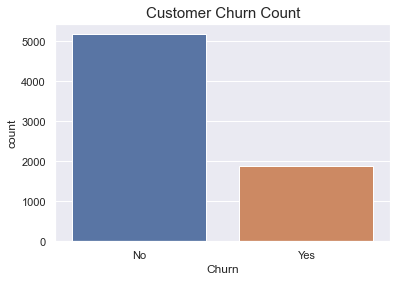

In [37]:
# Univariate Analysis - Target variable
plt.title('Customer Churn Count', fontsize=15)
sns.countplot(x='Churn', data=df)

plt.show()

**Target Variable Insight**

Based from result above, We can see that the majority of the target class is `No` with percentage of `0.7` compared to class `Yes` with percentage of `0.3`.\
Since the target has `0.7 : 0.3 ratio`, I consider this as `moderate imbalance dataset`.

**Service Related Analysis**

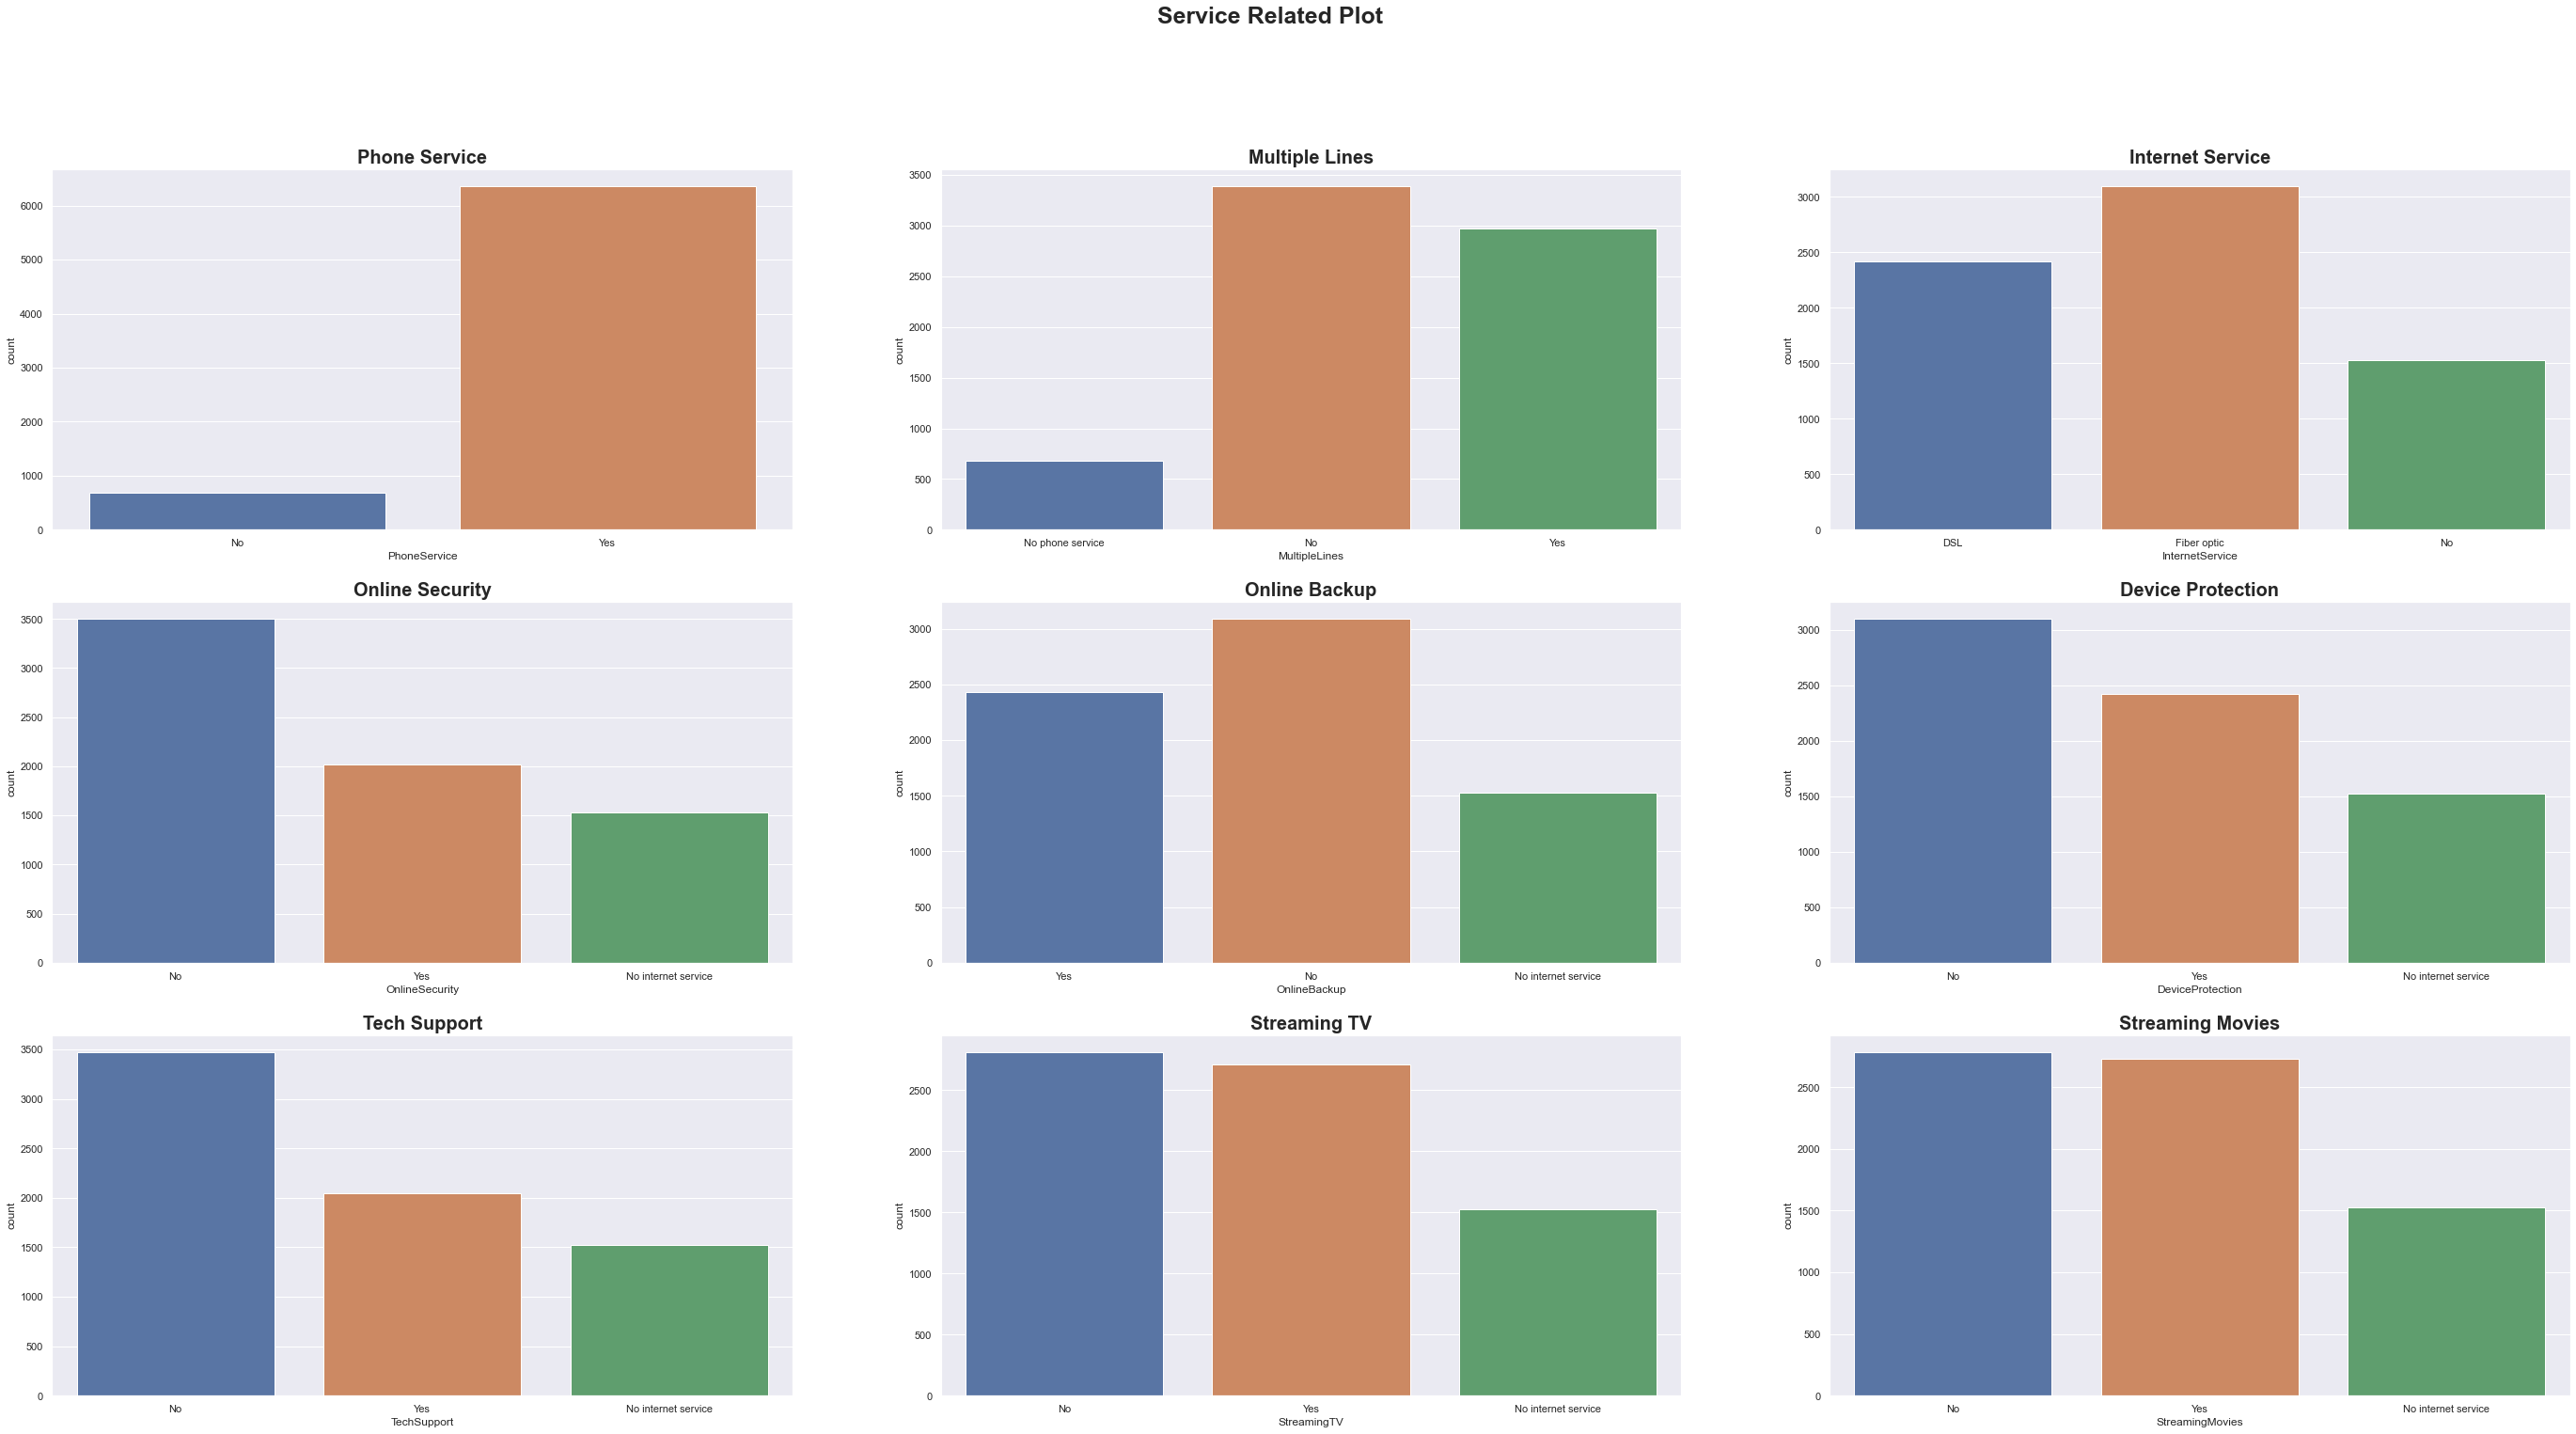

In [38]:
# Univariate Analysis - Service Related
fig, ax = plt.subplots(3,3, figsize=(24 * 2, 24))
fig.suptitle('Service Related Plot', fontsize=25, weight='bold')

sns.countplot(data=df, x='PhoneService', ax=ax[0,0])
ax[0,0].set_title('Phone Service', weight='bold', fontsize=20)

sns.countplot(data=df, x='MultipleLines', ax=ax[0,1])
ax[0,1].set_title('Multiple Lines', weight='bold', fontsize=20)

sns.countplot(data=df, x='InternetService', ax=ax[0,2])
ax[0,2].set_title('Internet Service', weight='bold', fontsize=20)

sns.countplot(data=df, x='OnlineSecurity', ax=ax[1,0])
ax[1,0].set_title('Online Security', weight='bold', fontsize=20)

sns.countplot(data=df, x='OnlineBackup', ax=ax[1,1])
ax[1,1].set_title('Online Backup', weight='bold', fontsize=20)

sns.countplot(data=df, x='DeviceProtection', ax=ax[1,2])
ax[1,2].set_title('Device Protection', weight='bold', fontsize=20)

sns.countplot(data=df, x='TechSupport', ax=ax[2,0])
ax[2,0].set_title('Tech Support', weight='bold', fontsize=20)

sns.countplot(data=df, x='StreamingTV', ax=ax[2,1])
ax[2,1].set_title('Streaming TV', weight='bold', fontsize=20)

sns.countplot(data=df, x='StreamingMovies', ax=ax[2,2])
ax[2,2].set_title('Streaming Movies', weight='bold', fontsize=20)

plt.show()

**Service Related Insight**

Based from graph above, I can say that:
- Majority of the customer has `Phone Service`, some of them even has `Multiple Lines.` Only handful of customer has no `Phone Service`
- Majority of the customer signed for `Internet Service`, most of them prefer to `Fiber Optic` technology rather than `DSL.`
- Majority of the customer has no `Online Security`, `Online Backup`, `Device Protection`, and also `Tech Support.` This could mean that most our customer is not well aware of their safety `or` indicates that our company doesn't educate enough about their safety.
- There is no significant difference between customer that signed for streaming services and those who doesn't.

**Customer Account Information Analysis**

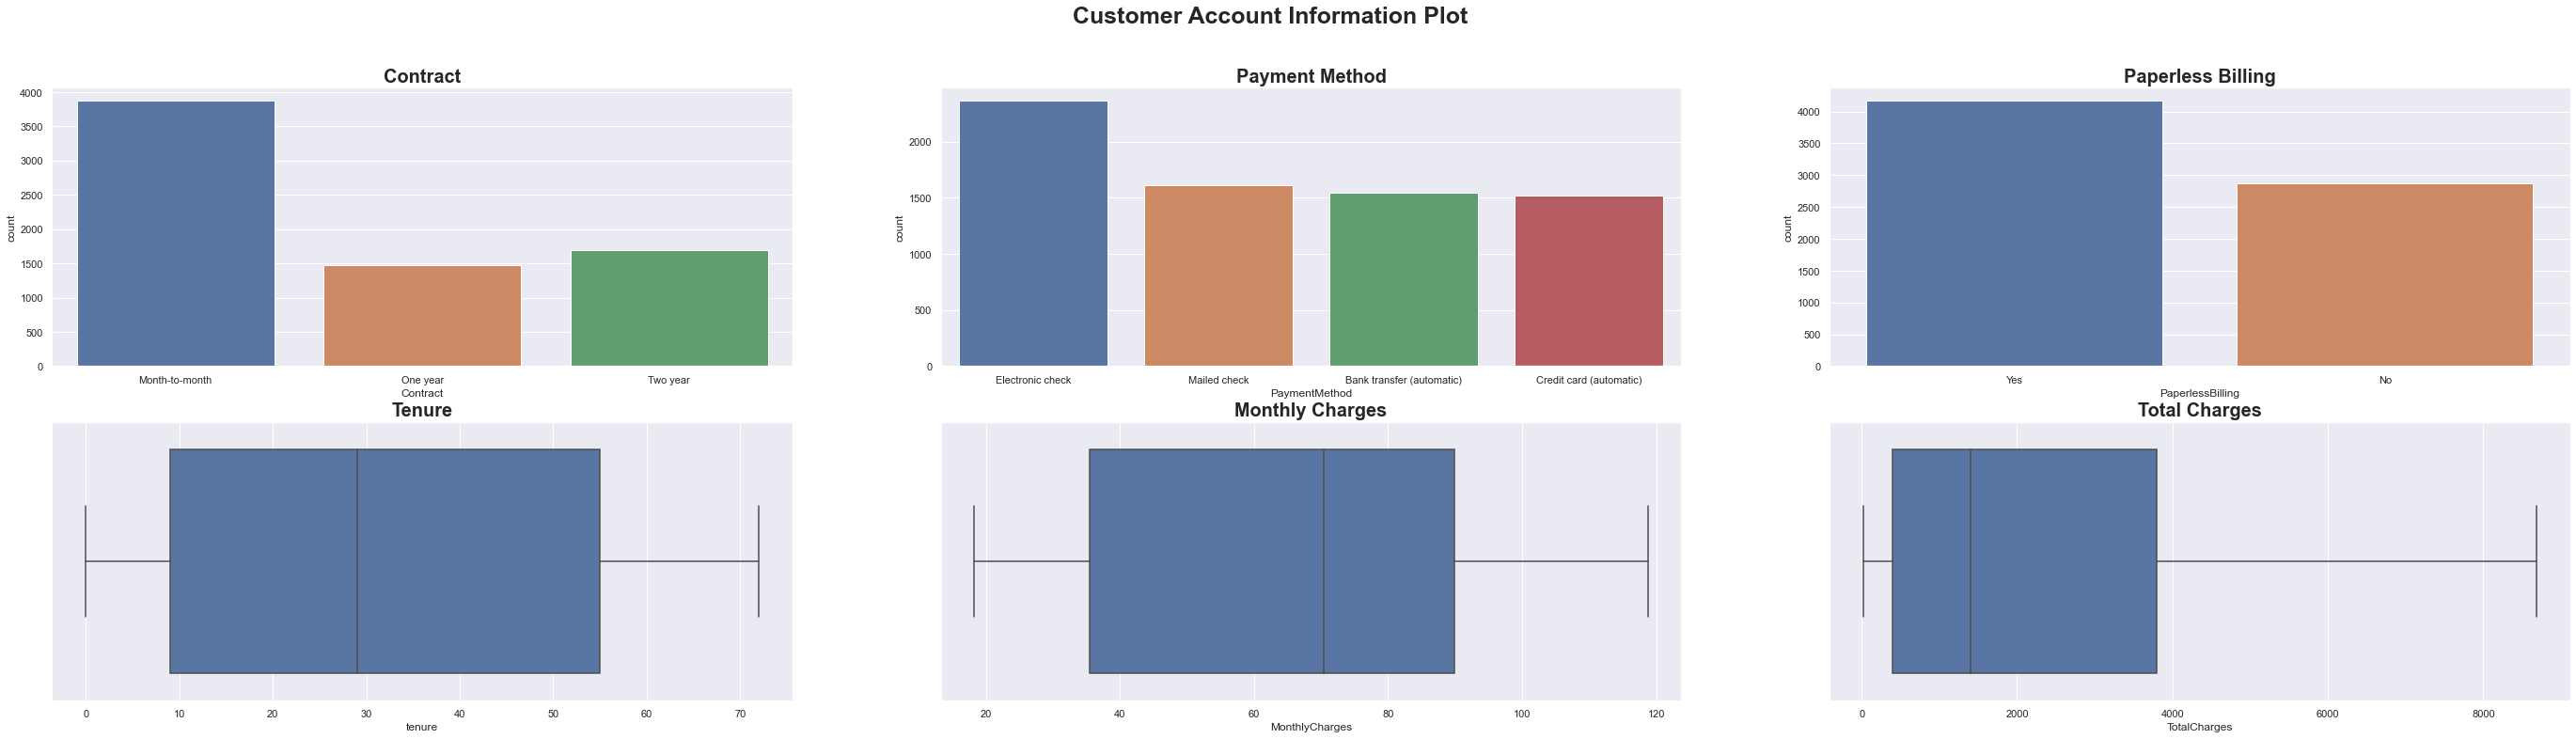

In [39]:
# Univariate Analysis - Customer Account Information Related
fig, ax = plt.subplots(2,3, figsize=(24 * 2, 12))
fig.suptitle('Customer Account Information Plot', fontsize=25, weight='bold')

sns.countplot(data=df, x='Contract', ax=ax[0,0])
ax[0,0].set_title('Contract', weight='bold', fontsize=20)

sns.countplot(data=df, x='PaymentMethod', ax=ax[0,1])
ax[0,1].set_title('Payment Method', weight='bold', fontsize=20)

sns.countplot(data=df, x='PaperlessBilling', ax=ax[0,2])
ax[0,2].set_title('Paperless Billing', weight='bold', fontsize=20)

sns.boxplot(data=df, x='tenure', ax=ax[1,0])
ax[1,0].set_title('Tenure', weight='bold', fontsize=20)

sns.boxplot(data=df, x='MonthlyCharges', ax=ax[1,1])
ax[1,1].set_title('Monthly Charges', weight='bold', fontsize=20)

sns.boxplot(data=df, x='TotalCharges', ax=ax[1,2])
ax[1,2].set_title('Total Charges', weight='bold', fontsize=20)

plt.show()

**Customer Account Information Insight**

Based from graph above, I can say that:
- `Month-to-month` is most prefered contract type. Also there is no significant difference between `One year contract` count and `two year contract` count.
- `Electronic check` is most prefered payment method. Also there is no significant difference between other payment method. `Paperless Billing` is also most prefered billing method.
- Our customer has median `Tenure` of thirty months, with median `Monthly Charges` around `$70.` Both has slight skew in the distribution.
- It shown that `TotalCharges` has skew distribution.

**Demographic Information Analysis**

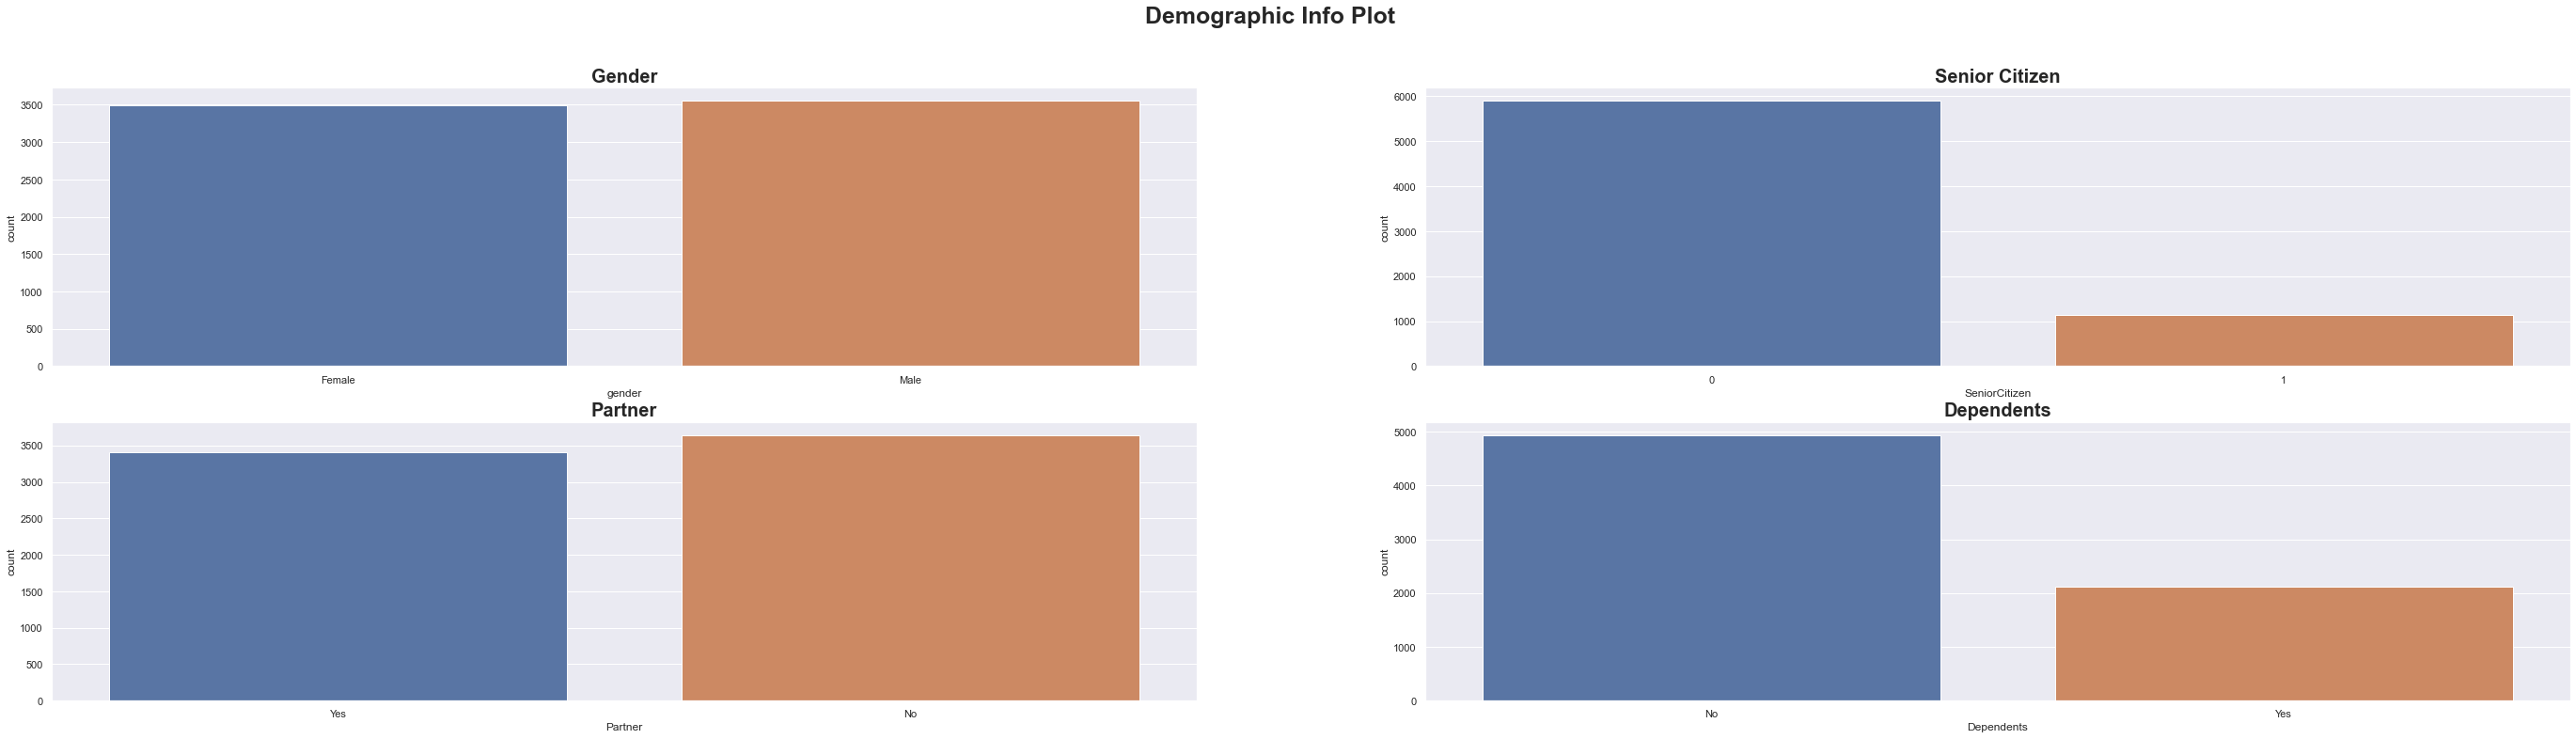

In [40]:
# Univariate Analysis - Customer Demographic Related
fig, ax = plt.subplots(2,2, figsize=(24 * 2, 12))
fig.suptitle('Demographic Info Plot', fontsize=25, weight='bold')

sns.countplot(data=df, x='gender', ax=ax[0,0])
ax[0,0].set_title('Gender', weight='bold', fontsize=20)

sns.countplot(data=df, x='SeniorCitizen', ax=ax[0,1])
ax[0,1].set_title('Senior Citizen', weight='bold', fontsize=20)

sns.countplot(data=df, x='Partner', ax=ax[1,0])
ax[1,0].set_title('Partner', weight='bold', fontsize=20)

sns.countplot(data=df, x='Dependents', ax=ax[1,1])
ax[1,1].set_title('Dependents', weight='bold', fontsize=20)

plt.show()

**Demographic Information Insight**

Based from graph above, I can say that:
- Our service is equally popular regardless customer `Gender` and `Partner` type.
- Majority of our customer is relatively `young (not senior citizen)` and has no `Dependents.`

### Bivariate/Multivariate Analysis

In this part of sub-process, I'll try to analyze correlation between each fatures and target variable.\
For `numerical` features, I'll use `Correlation Ratio` and for `categorical` features, I'll use `Crammer's` method.\
Before starting the analysis, I'll seperate the dataset columns into `numerical` and `categorical` features.

In [41]:
# Features Categorization
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

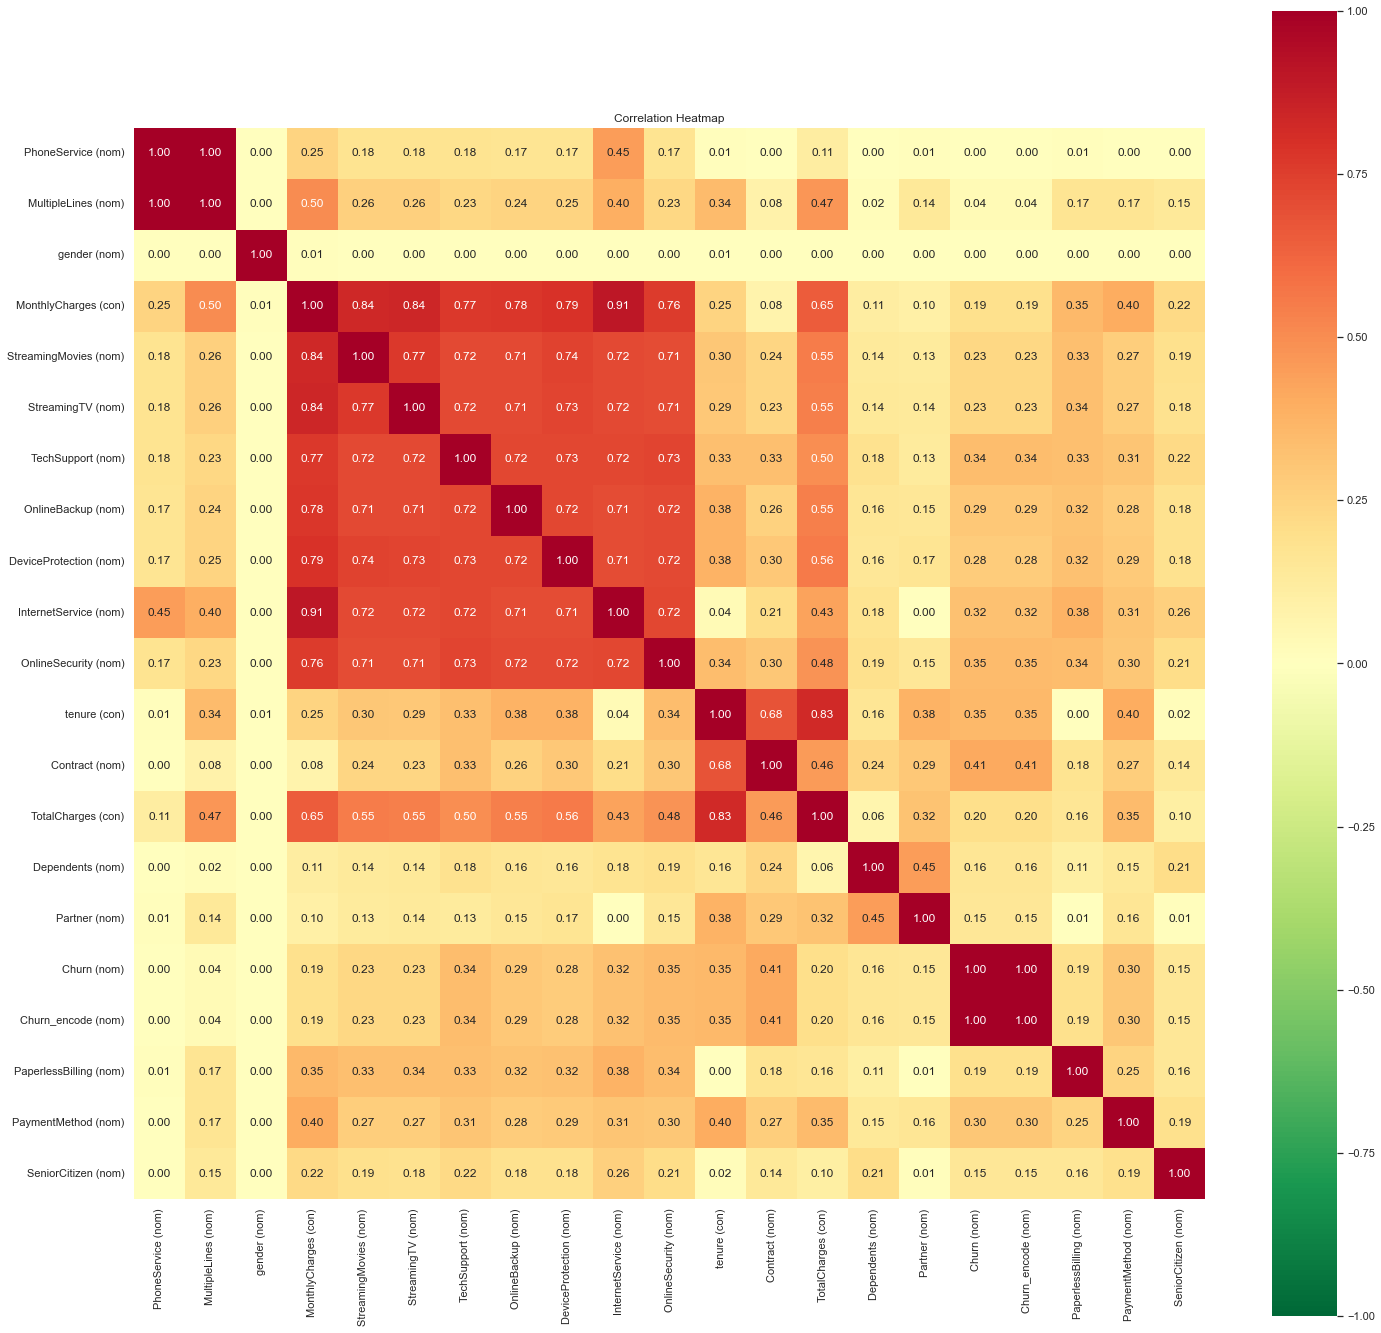

In [42]:
# Correlation Plot
associations(dataset=df, figsize=(24,24),
            title= 'Correlation Heatmap',
            numerical_columns=num_col, # Numerical Columns
            nom_num_assoc= 'correlation_ratio', # Correlation Calculation Method for numerical columns
            nominal_columns=cat_col, # Catetgorical Columns
            nom_nom_assoc= 'cramer', # Correlation Calculation Method for categorical columns
            nan_strategy='drop_samples',
            clustering=True,
            mark_columns=True,
            cmap='RdYlGn_r'
            )

plt.show()

**Multivariate Analysis Insight**

In this correlation matrix, every correlation between each feature are calculated. The result will be vary from `-1 to 1`, in which:
- Any value that getting closer to 1 represent strong positive correlation
- Any value that getting closer to -1 represent strong negative correlation
- Middle value will be 0 that represent neutral correlation

From the graph above, I can say that:
- All features has neutral correlation with target variable (`Churn`)

Features that shows strong correlation between features are:

- `PhoneService` and `MultipleLines`
- `MonthlyCharges` and `StreamingTV, StreamingMovies, TechSupport, OnlineBackup, DeviceProtection, InternetService, OnlineSecurity` 
- `TotalCharges` and `tenure`


## V. Data Preprocessing

### Dataset Splitting

In this process, I will split my dataset into different set:

1. Use 80% from dataset for `Train Set`
2. Use 20% from dataset for `Test Set`
3. Use 20% from `Train Set` for `Validation Set`

all of those entries will be randomly selected from the dataset.

In [43]:
#Set Random State
random_state = 42

In [44]:
# Splitting Dataset

# X will be consist of features only
X = df.drop(['Churn'], axis=1)

# y will be consist of target only
y = df['Churn']

In [45]:
# Splitting the dataset into the Training_validation set and Test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

In [46]:
# Splitting the dataset into the Training set and Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=random_state, stratify=y_train_val)

In [47]:
# Size Summary

print('Train Set shape : ', X_train.shape)
print('Val Set shape : ', X_val.shape)
print('Test Set shape : ', X_test.shape)

Train Set shape :  (4507, 20)
Val Set shape :  (1127, 20)
Test Set shape :  (1409, 20)


### Outliers Detection

In this sub-process, I will try to identify any outliers inside each `numerical` features. Before do the checking, I'll seperate the features into `numerical` and `categorical` features and then:

- I'll check the distribution of each variable, using skewness value. Any skewness value outside `-0.5 to 0.5` will be considered as `Skewed Distribution`, while any skewness value inside `-0.5 to 0.5` will be considered as `Normal Distribution`.
- I'll count how many outliers there in each variable. For `Normal Distribution`, I'll use `Z-score` to determine the outliers threshold. For `Skewed Distribution`, I'll use `IQR` to determine the outliers threshold.
- Summarize all the information above.

In [48]:
# column categorization
def col_categorization(df):
    global X_train_num, X_train_cat
    X_train_num = X_train[num_col]
    X_train_cat = X_train[cat_col]
    print("Generate 'X_train_num' and 'X_train_cat'")

# column categorization
col_categorization(X_train)

Generate 'X_train_num' and 'X_train_cat'


In [49]:
# Confirmation Check
X_train_num.head()

,tenure,MonthlyCharges,TotalCharges
6592,26,59.45,1507.00
464,72,116.05,8404.90
5420,70,114.30,8244.30
629,49,90.05,4547.25
431,72,65.20,4784.45


In [50]:
# Confirmation Check
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen
6592,Male,No,No,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,No,Credit card (automatic),0
464,Male,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),1
5420,Male,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
629,Male,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Credit card (automatic),1
431,Female,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [51]:
# create function to detect outliers based on distribution
def detect_outliers(df, k=1.5):
    #create dataframe with columns name : feature, distribution, outlier
    global df_outliers
    df_outliers = pd.DataFrame(columns=['col_name','distribution','bottom_limit', 'upper_limit', 'left_tail','right_tail','outliers_count','percentage'])
    #create loop for each feature
    for i in range(len(df.columns)):
        #create if statement for each distribution
        if df.iloc[:,i].skew() > -0.5 and df.iloc[:,i].skew() < 0.5 :
            #count outlier for normal distribution based on z-score
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'normal', # distribution,
                                stats.zscore(df.iloc[:,i], nan_policy='omit').min(), # bottom limit
                                stats.zscore(df.iloc[:,i], nan_policy='omit').max(), # upper limit
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))<-3].count(), # left_tail
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # right_tail
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # outliers_count
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count()/len(df.iloc[:,i])*100] # percentage
        else:
            #count outlier for skew distribution based on IQR
            Q1 = df.iloc[:,i].quantile(0.25)
            Q3 = df.iloc[:,i].quantile(0.75)
            IQR = Q3 - Q1
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'skew', # distribution,
                                Q1-k*IQR, # bottom limit
                                Q1+k*IQR, # upper limit
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))].count(), # left_tail
                                df.iloc[:,i][(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # right_tail
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # outliers_count
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count()/len(df.iloc[:,i])*100] # percentage
    print('Generate df_outliers')


In [52]:
# Outliers Summary
detect_outliers(X_train_num)
df_outliers.sort_values(by='percentage',ascending=False)

Generate df_outliers


,col_name,distribution,bottom_limit,upper_limit,left_tail,right_tail,outliers_count,percentage
0,tenure,normal,-1.309988,1.610432,0,0,0,0.0
1,MonthlyCharges,normal,-1.542431,1.800950,0,0,0,0.0
2,TotalCharges,skew,-4769.800000,5541.425000,0,0,0,0.0


Looking at `outliers_count`, looks like there is no outliers in the dataset, So let's continue the process.

In [53]:
#create function to handling outliers
def handling_outliers(exception_list):
   global X_train,y_train, norm_under_5, norm_5to15, skew_under_5, skew_5to15
   exception_list = exception_list

   norm_under_5 = df_outliers[df_outliers['distribution']=='normal'][df_outliers['percentage']<5]['col_name'].tolist()
   norm_5to15 = df_outliers[df_outliers['distribution']=='normal'][df_outliers['percentage']>5][df_outliers['percentage']<15]['col_name'].tolist()
   skew_under_5 = df_outliers[df_outliers['distribution']=='skew'][df_outliers['percentage']<5]['col_name'].tolist()
   skew_5to15 = df_outliers[df_outliers['distribution']=='skew'][df_outliers['percentage']>5][df_outliers['percentage']<15]['col_name'].tolist() 

   norm_under_5 = [x for x in norm_under_5 if x not in exception_list]
   norm_5to15 = [x for x in norm_5to15 if x not in exception_list]
   skew_under_5 = [x for x in skew_under_5 if x not in exception_list]
   skew_5to15 = [x for x in skew_5to15 if x not in exception_list]


   custom_list = ['norm_under_5','norm_over_5','skew_under_5','skew_over_5']

   for i in custom_list: 
      if i == 'norm_under_5' and len(norm_under_5)!= 0:
         
         trim_norm = OutlierTrimmer(capping_method='gaussian',
                                    tail='both', # left/right/both
                                    fold=3, # for gaussian 2 or 3
                                    variables=norm_under_5,
                                    missing_values='ignore')    
         trim_norm.fit(X_train)

         df = trim_norm.transform(X_train)
         
         #intersection of y_train and X_train index location
         y_train = y_train.loc[y_train.index.intersection(X_train.index)]

      elif i == 'norm_over_5' and len(norm_5to15)!= 0:

         winsorizer_norm = Winsorizer(capping_method='gaussian',
                                    tail='both', # left/right/both
                                    fold=3, # for gaussian 2 or 3
                                    variables=norm_5to15,
                                    missing_values='ignore')    
         winsorizer_norm.fit(X_train)

         X_train = winsorizer_norm.transform(X_train)
       
   
      elif i == 'skew_under_5'and len(skew_under_5)!= 0:
         
         trim_skew = OutlierTrimmer(capping_method='iqr',
                                    tail='both', # left/right/both
                                    fold=1.5, # for iqr 1 or 2
                                    variables=skew_under_5,
                                    missing_values='ignore')    
         trim_skew.fit(X_train)

         X_train = trim_skew.transform(X_train)

         #intersection of y_train and X_train
         y_train = y_train.loc[y_train.index.intersection(X_train.index)]
   
      elif i == 'skew_over_5' and len(skew_5to15)!= 0:

         winsorizer_skew = Winsorizer(capping_method='iqr',
                                    tail='both', # left/right/both
                                    fold=1.5, # for iqr 1 or 2
                                    variables=skew_5to15,
                                    missing_values='ignore')    
         winsorizer_skew.fit(X_train)

         X_train = winsorizer_skew.transform(X_train)

### Missing Value Detection

In this sub-process, I will handle any missing value inside the dataset.

From the previous process, We know that the only features that has missing values is `TotalCharges` feature. Let's take a closer look into it.

In [54]:
# Missing Value in Train Set
X_train[X_train['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_encode
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,0


In [55]:
# Missing Value in Val Set
X_val[X_val['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_encode
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0


In [56]:
# Missing Value in Test Set
X_test[X_test['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_encode
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0


Based from result above, I can see pattern in this missing values. All `TotalCharges` that value are missing, has `tenure` value of 0. Although `tenure` has 0 values, those customer has already signed `Contract` of Two or One Year period.\
From here, I can say that these customer are newly subscribed to our service, they had not used the service over a month; hence their tenure is 0 and their `TotalCharges` is null (no charges yet), but they had `MonthlyCharges` value (that will be paid in the end of the month).

Based on explanation above, I'll consider this as `Missing Not at Random`, I'll impute missing value in `Total Charges` with `MonthlyCharges` value in each respective entry.

In [57]:
# Missing Value Handling

# Train Set
X_train['TotalCharges'].fillna(X_train['MonthlyCharges'], inplace=True)

# Validation Set
X_val['TotalCharges'].fillna(X_val['MonthlyCharges'], inplace=True)

# Test Set
X_test['TotalCharges'].fillna(X_test['MonthlyCharges'], inplace=True)

# Confirmation 
print('Train Set:')
print(X_train['TotalCharges'].isna().sum())
print()
print('Val Set:')
print(X_val['TotalCharges'].isna().sum())
print()
print('Test Set:')
print(X_test['TotalCharges'].isna().sum())

Train Set:
0

Val Set:
0

Test Set:
0


From above process, I can confirm that the dataset is now free from any missing values. Let's continue to the next process.

### Feature Selection

In this part of sub-process, I'll chose features that will be included in my model. I'll recall the correlation I have already made in previous process first.

And once again let's see the correlation matrix between each parameter

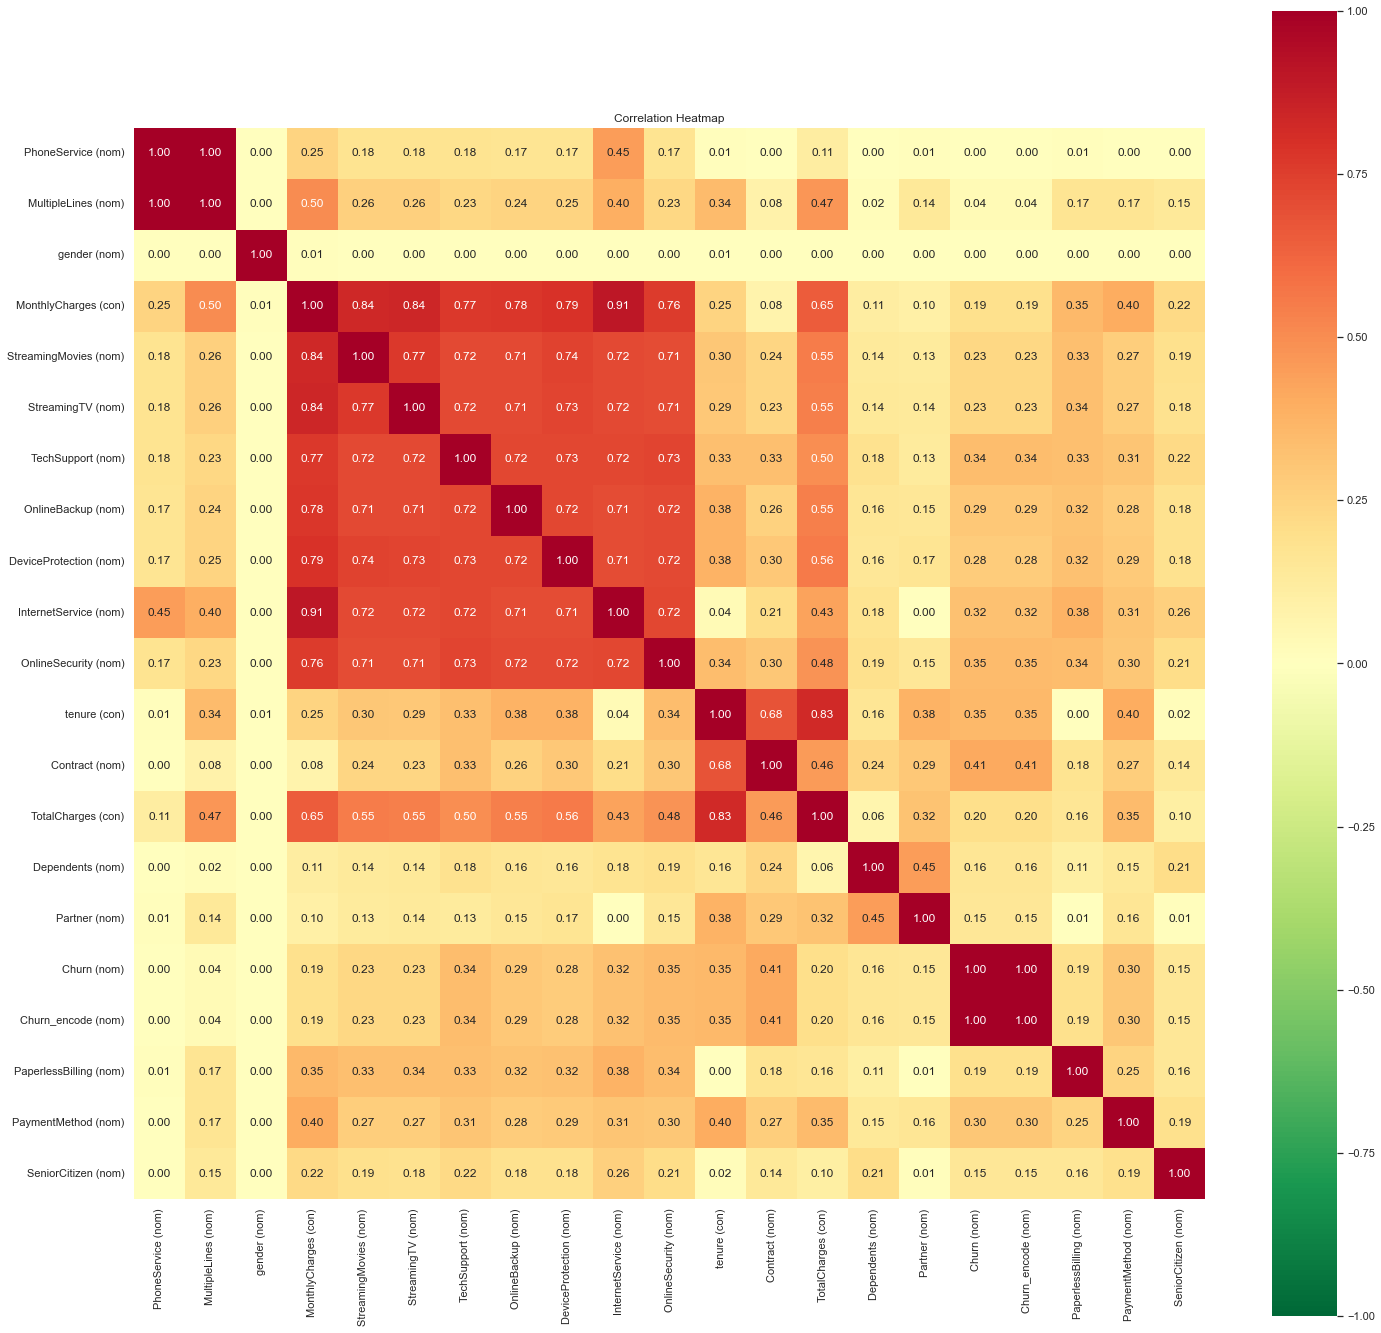

In [58]:
# Correlation Plot
correlation = associations(dataset=df, figsize=(24,24),
                            title= 'Correlation Heatmap',
                            numerical_columns=num_col, # Numerical Columns
                            nom_num_assoc= 'correlation_ratio', # Correlation Calculation Method for numerical columns
                            nominal_columns=cat_col, # Catetgorical Columns
                            nom_nom_assoc= 'cramer', # Correlation Calculation Method for categorical columns
                            nan_strategy='drop_samples',
                            clustering=True,
                            mark_columns=True,
                            cmap='RdYlGn_r'
                            )
correlation
plt.show()

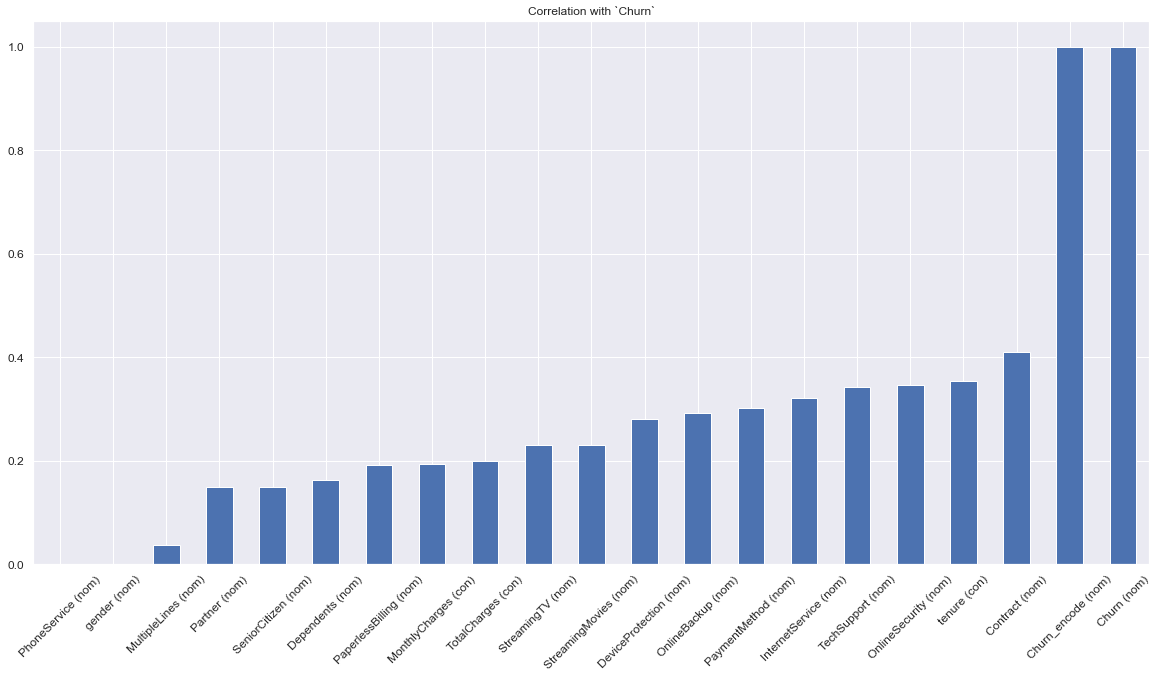

In [59]:
# Correlation Plot #2
correlation['corr'].iloc[16].abs().sort_values().plot.bar(figsize=(20,10), title='Correlation with `Churn`', fontsize=12, rot=45, grid=True) # .iloc[16] is the index for `Churn` target

plt.show()

Based on heatmap analysis (Multivariate Analysis), We know that features that shows strong correlation between features are:

- `PhoneService` and `MultipleLines`
- `MonthlyCharges` and `StreamingTV, StreamingMovies, TechSupport, OnlineBackup, DeviceProtection, InternetService, OnlineSecurity` 
- `TotalCharges` and `tenure`

Because above features shows high correlation with each others, I'll choose one feature over another and here's what I choose to include in my model:
- Drop `PhoneService` and keep `MultipleLines`, because `PhoneService` has lowest correlation with `Churn.`
- Drop `MonthlyCharges` and keep `StreamingTV, StreamingMovies, TechSupport, OnlineBackup, DeviceProtection, InternetService, OnlineSecurity`, because `MonthlyCharges` is heavily affected by how many services the customer subscribed.
- Drop `TotalCharges` and keep `tenure`, because `tenure` has higher correlation with `Churn` than `TotalCharges`, also higher tenure shows that the customer is loyal to us.

Besides above features, I'll also drop these features:
- Drop `StreamingTV` and keep `StreamingMovies`, because in my opinion both service is quite similar (streaming service), hence I choose to use one.

In [60]:
# Features Re-Categorization
# Features listed here are features that gonna be put in the model

num_col = ['tenure']
cat_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

### Feature Engineering (Scaling/Encoding)

In this part of sub-process, I will make the pipeline for data preparation process.\
This process consist of `Scaling and Encoding` input features so that it can be processed by the model.

Before start the process, I'll categorize each input variable into two different type:

num_col = [`'tenure'`]\
cat_col = [`'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'`]

And then, I'll do:
- `One Hot Encoding` for `cat_col`
- `Standard Scaling` for `num_col`

In [61]:
# Combines selected features into one
final_features = num_col + cat_col

In [62]:
# Use selected variables
X_train = X_train[final_features]
X_val =  X_val[final_features]
X_test = X_test[final_features]

In [63]:
# Make the Feature Engineering Pipeline
pipe_FE = ColumnTransformer([
    ('OHE', OneHotEncoder(handle_unknown='ignore'), cat_col),
    ('StdScaler', StandardScaler(), num_col)
])  

In [64]:
# Feature Engineering Process
X_train_final = pipe_FE.fit_transform(X_train)
X_val_final = pipe_FE.transform(X_val)
X_test_final = pipe_FE.transform(X_test)

# Target label encoding
y_train = y_train.map({'Yes':1, 'No':0})
y_val = y_val.map({'Yes':1, 'No':0})
y_test = y_test.map({'Yes':1, 'No':0})

### Save Feature Engineering Pipeline

In this part of sub-process, I'll save the `Feature Engineering` pipeline so that it can be reused or deployed in the future.

In [65]:
# Save FE Pipeline

with open('pipe_FE.pkl', 'wb') as f:
    pickle.dump(pipe_FE, f)

### Tensorflow input Data Pipeline

In this part of sub-process, I'll create the `Tensorflow` input data pipeline.

In [66]:
# Tensorflow input data pipeline

X_train_pipe = Dataset.from_tensor_slices((X_train_final, y_train)).batch(128)
X_val_pipe = Dataset.from_tensor_slices((X_val_final, y_val)).batch(128)
X_test_pipe = Dataset.from_tensor_slices((X_test_final, y_test)).batch(128)

## VI. Model Definition

### Model
Here is my initial `Churn` classification model:

- Target Feature : `Churn`
- Input Feature : [`''gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'`]

This is only initial model, it may change in the future depends on my model evaluation result.

### Algortihm
In this project I will utilize `Sequential and Functional` neural network from `tensorflow` library.\

Because the main objectives is binary-classification, I'll set these paramaeters in advance:
- output layers : 1 neuron
- activation function : `sigmoid`
- loss function : `binary_crossentropy`

In [67]:
# Sequential API Method

# Model Declaration
model_seq = Sequential()
model_seq.add(Dense(8, activation='relu', input_shape=(X_train_final.shape[1], )))
model_seq.add(Dense(1, activation='sigmoid'))

# Compile Model
model_seq.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [68]:
# Functional API Method

data_in = Input(shape=(X_train_final.shape[1],))
hidden_1 = Dense(8, activation='relu')(data_in)
out = Dense(1, activation='sigmoid')(hidden_1)

# Combine
model_func = Model(inputs=data_in,
              outputs=out)

# Compile Model
model_func.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Model Evaluation (Metrics)

To evaluate the model performance, I will utilize `Accuracy, Loss, and Classification Report`

## VII. Model Training

In this process, I will train the model using the input data pipeline from previous process.

In [69]:
# Train Sequential Method
history_1 = model_seq.fit(X_train_pipe, epochs=100, validation_data=(X_val_pipe))

Epoch 1/100
36/36 [==============================] - 3s 9ms/step - loss: 0.7131 - accuracy: 0.4560 - val_loss: 0.6535 - val_accuracy: 0.6486
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.7040 - val_loss: 0.5673 - val_accuracy: 0.7462
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 0.5330 - accuracy: 0.7440 - val_loss: 0.5072 - val_accuracy: 0.7374
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4862 - accuracy: 0.7473 - val_loss: 0.4734 - val_accuracy: 0.7480
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4610 - accuracy: 0.7701 - val_loss: 0.4518 - val_accuracy: 0.7773
Epoch 6/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4457 - accuracy: 0.7892 - val_loss: 0.4380 - val_accuracy: 0.7986
Epoch 7/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4362 - accuracy: 0.7974 - val_loss: 0.4290 - val_accuracy: 0.8110
Epoch 8/100
3

In [70]:
# Train Functional API Method
history_2 = model_func.fit(X_train_pipe, epochs=100, validation_data=(X_val_pipe))

Epoch 1/100
36/36 [==============================] - 1s 9ms/step - loss: 0.6548 - accuracy: 0.6239 - val_loss: 0.5855 - val_accuracy: 0.7107
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 0.5575 - accuracy: 0.7322 - val_loss: 0.5202 - val_accuracy: 0.7569
Epoch 3/100
36/36 [==============================] - 0s 6ms/step - loss: 0.5050 - accuracy: 0.7586 - val_loss: 0.4835 - val_accuracy: 0.7684
Epoch 4/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4750 - accuracy: 0.7730 - val_loss: 0.4622 - val_accuracy: 0.7844
Epoch 5/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4579 - accuracy: 0.7790 - val_loss: 0.4496 - val_accuracy: 0.7968
Epoch 6/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4476 - accuracy: 0.7854 - val_loss: 0.4418 - val_accuracy: 0.7941
Epoch 7/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4406 - accuracy: 0.7886 - val_loss: 0.4366 - val_accuracy: 0.7995
Epoch 8/100
3

## VIII. Model Evaluation

Now, I will try to evaluate the trained model and make conclusion out of it.

### Accuracy and Loss Evaluation

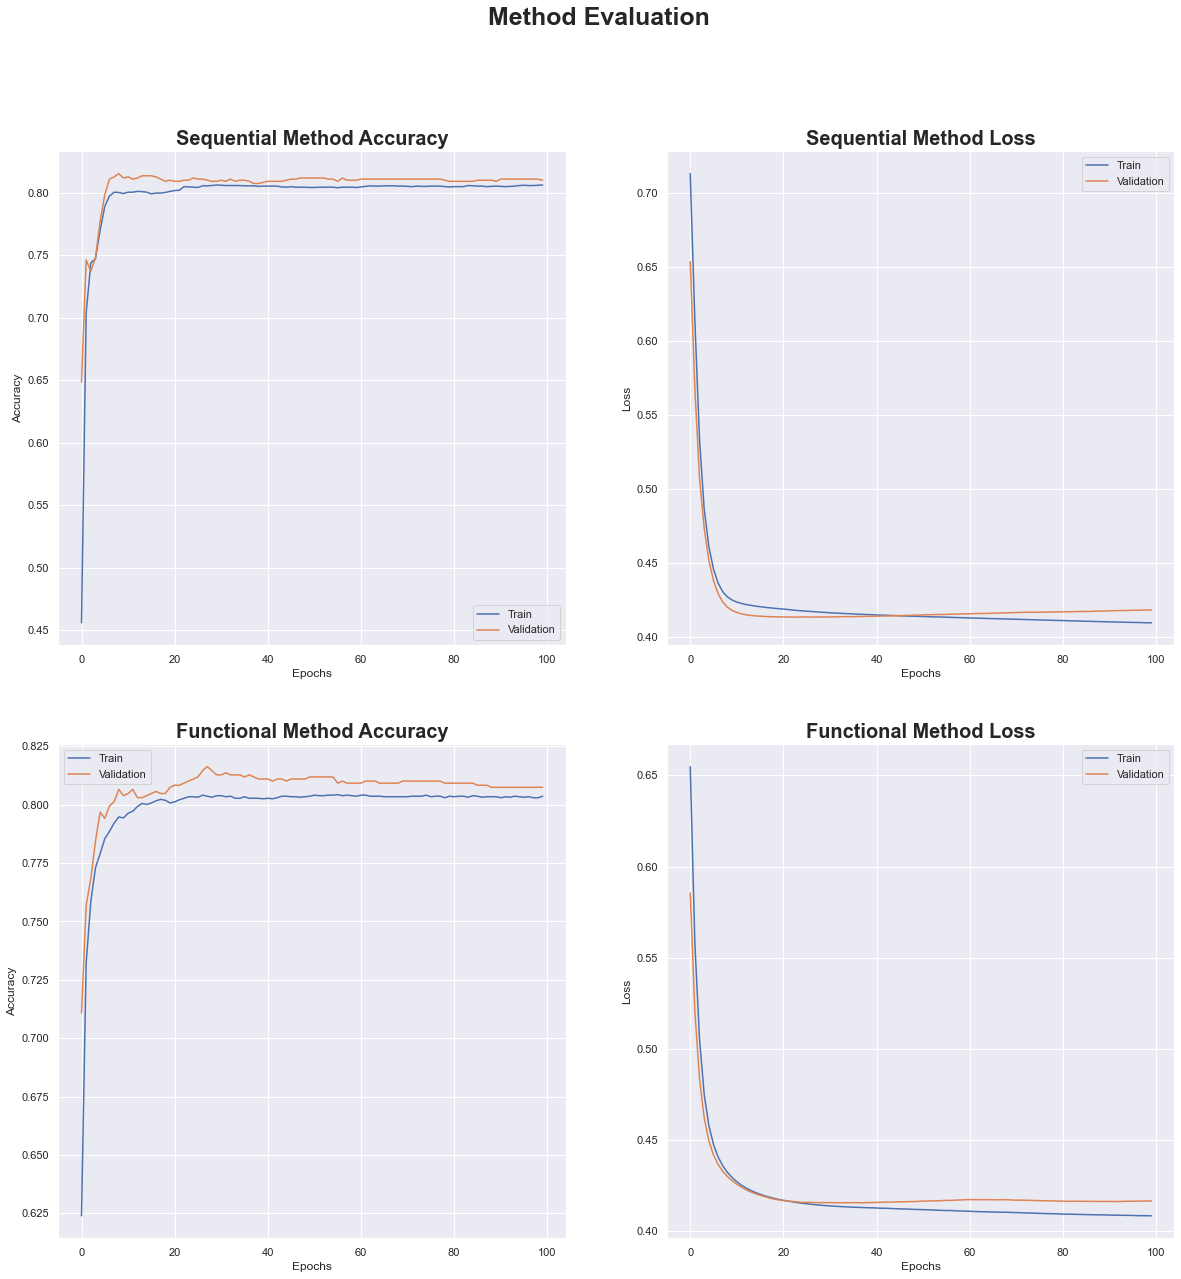

In [71]:
# Sequential Method vs Functional Method Evaluation

# Create dataframe
metrics_seq = pd.DataFrame(history_1.history)
metrics_func = pd.DataFrame(history_2.history)


# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle('Method Evaluation', fontsize=25, weight='bold')

ax1.plot(metrics_seq.index, metrics_seq['accuracy'], label='Train')
ax1.plot(metrics_seq.index, metrics_seq['val_accuracy'], label='Validation')
ax1.set_title('Sequential Method Accuracy', fontsize=20, weight='bold')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(metrics_seq.index, metrics_seq['loss'], label='Train')
ax2.plot(metrics_seq.index, metrics_seq['val_loss'], label='Validation')
ax2.set_title('Sequential Method Loss', fontsize=20, weight='bold')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

ax3.plot(metrics_func.index, metrics_func['accuracy'], label='Train')
ax3.plot(metrics_func.index, metrics_func['val_accuracy'], label='Validation')
ax3.set_title('Functional Method Accuracy', fontsize=20, weight='bold')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')
ax3.legend()

ax4.plot(metrics_func.index, metrics_func['loss'], label='Train')
ax4.plot(metrics_func.index, metrics_func['val_loss'], label='Validation')
ax4.set_title('Functional Method Loss', fontsize=20, weight='bold')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Loss')
ax4.legend()

plt.show()

Based on graph above, We can see that:

**Sequential Method**
- by the epochs 20, the model start showing stable performance
- `Accuracy` shows stable performance as soon as epoch reach 20
- `Loss` converge at around epochs = 10, but they start separating again after epochs reach 50

**Functional Method**
- by the epochs 20, the model start showing stable performance
- `Accuracy` shows stable performance as soon as epoch reach 20
- `Loss` converge at around epochs = 25, but they start separating again after epochs reach 40

**Note**
Due to neural network nature that has poor reproduceability, I'll save above graph as a figure and you can read the corresponding analysis in the `Conslusion Section.`

### Classification Report Evaluation

In [72]:
# Classification Report - Sequential Method
print('Classification Report - Sequential Method')
print()

y_train_pred_seq = model_seq.predict(X_train_pipe)
y_train_pred_seq = np.where(y_train_pred_seq > 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_seq))

print('_____'*15)

y_test_pred_seq = model_seq.predict(X_test_pipe)
y_test_pred_seq = np.where(y_test_pred_seq > 0.5, 1, 0)
print(classification_report(y_test, y_test_pred_seq))

Classification Report - Sequential Method

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3311
           1       0.66      0.55      0.60      1196

    accuracy                           0.81      4507
   macro avg       0.75      0.72      0.74      4507
weighted avg       0.80      0.81      0.80      4507

___________________________________________________________________________
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [73]:
# Classification Report - Functional Method
print('Classification Report - Functional Method')
print()

y_train_pred_func = model_func.predict(X_train_pipe)
y_train_pred_func = np.where(y_train_pred_func > 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_func))

print('_____'*15)

y_test_pred_func = model_func.predict(X_test_pipe)
y_test_pred_func = np.where(y_test_pred_func > 0.5, 1, 0)
print(classification_report(y_test, y_test_pred_func))

Classification Report - Functional Method

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3311
           1       0.65      0.55      0.60      1196

    accuracy                           0.80      4507
   macro avg       0.75      0.72      0.73      4507
weighted avg       0.79      0.80      0.80      4507

___________________________________________________________________________
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



Based on result above, We can see that:

**Sequential Method**
- Shows medium `accuracy` differences between `training phase and testing phase.` (2% differences)
- Shows tendency to predict class 0 relatively well compared to predict class 1.

**Functional Method**
- Shows small `accuracy` differences between `training phase and testing phase.` (1% differences)
- Shows tendency to predict class 0 relatively well compared to predict class 1.

**Conclusion**
- Functional Method shows slight better performance than Sequential Method.
- I think both models perform similarily well.
- I decide to try improve my `Sequential Model` in the next process.


**Note**
Due to neural network nature that has poor reproduceability, I'll save above graph as a figure and you can read the corresponding analysis in the `Conslusion Section.`

### Model Improvement

In this part of sub-process, I will try to improve the selected model from previous process. I'll try to add `regularization and batch normalization to the model.` Also, I'll add another hidden layer and change the optimizer of the model.

In [74]:
# Sequential Method Improvement

# Model Declaration
model_seq_imp = Sequential()
model_seq_imp.add(Dense(8, activation='relu', input_shape=(X_train_final.shape[1],)))
model_seq_imp.add(Dense(4, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01)))
model_seq_imp.add(BatchNormalization())
model_seq_imp.add(Dense(1, activation='sigmoid'))

# Compile Model
model_seq_imp.compile(loss='binary_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

# Train Sequential Method
history_3 = model_seq_imp.fit(X_train_pipe, epochs=100, validation_data=(X_val_pipe))

Epoch 1/100
36/36 [==============================] - 1s 14ms/step - loss: 0.8275 - accuracy: 0.6341 - val_loss: 0.6361 - val_accuracy: 0.7400
Epoch 2/100
36/36 [==============================] - 0s 7ms/step - loss: 0.7496 - accuracy: 0.6656 - val_loss: 0.6311 - val_accuracy: 0.7489
Epoch 3/100
36/36 [==============================] - 0s 9ms/step - loss: 0.7041 - accuracy: 0.6807 - val_loss: 0.6277 - val_accuracy: 0.7382
Epoch 4/100
36/36 [==============================] - 0s 7ms/step - loss: 0.6717 - accuracy: 0.6994 - val_loss: 0.6219 - val_accuracy: 0.7533
Epoch 5/100
36/36 [==============================] - 0s 7ms/step - loss: 0.6466 - accuracy: 0.7133 - val_loss: 0.6137 - val_accuracy: 0.7622
Epoch 6/100
36/36 [==============================] - 0s 7ms/step - loss: 0.6257 - accuracy: 0.7286 - val_loss: 0.6034 - val_accuracy: 0.7613
Epoch 7/100
36/36 [==============================] - 0s 7ms/step - loss: 0.6076 - accuracy: 0.7382 - val_loss: 0.5922 - val_accuracy: 0.7622
Epoch 8/100


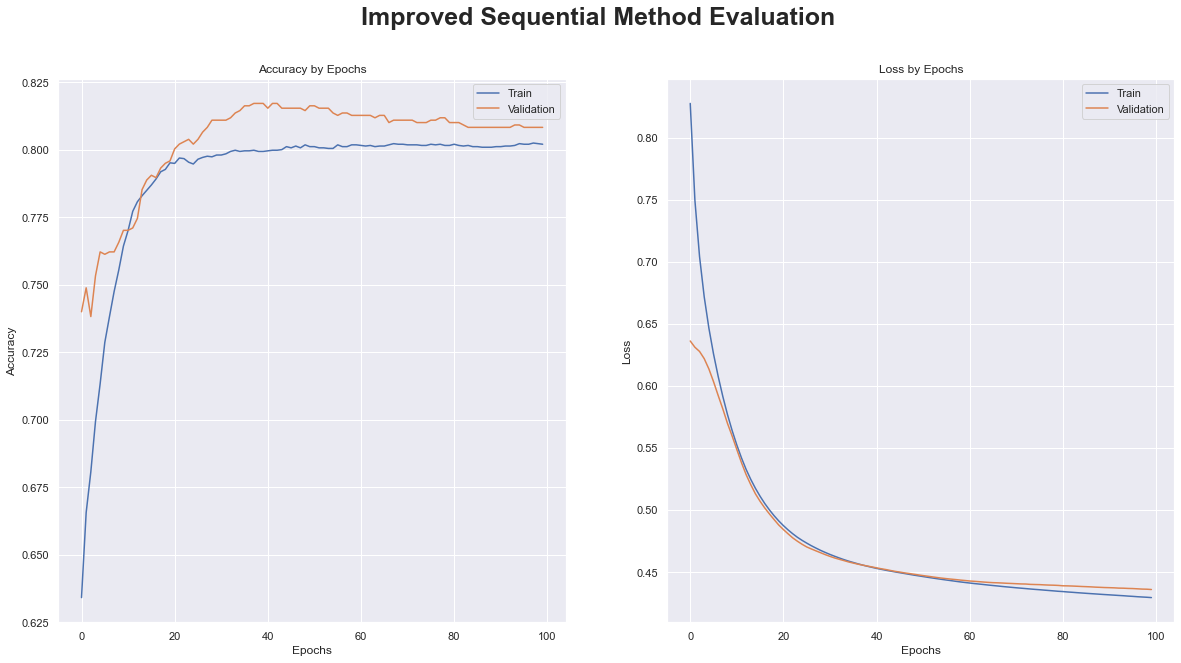

In [75]:
# Improved Sequential Method Evaluation

# Create dataframe
metrics_seq_imp = pd.DataFrame(history_3.history)

# Visualization
fig, ax = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('Improved Sequential Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.plot(metrics_seq_imp.index, metrics_seq_imp['accuracy'], label='Train')
plt.plot(metrics_seq_imp.index, metrics_seq_imp['val_accuracy'], label='Validation')
plt.title('Accuracy by Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(metrics_seq_imp.index, metrics_seq_imp['loss'], label='Train')
plt.plot(metrics_seq_imp.index, metrics_seq_imp['val_loss'], label='Validation')
plt.title('Loss by Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Based on graph above, We can see that:

**Improved Sequential Method**
- by the epochs 30, the model start showing stable performance
- `Accuracy` shows stable performance as soon as epoch reach 30 and have potential to improve as epoch gets higher.
- `Loss` converge at around epochs = 70, and have potential to improve as epoch gets higher.
- `Regularization` seems make the `Loss` metrics better.

**Note**
Due to neural network nature that has poor reproduceability, I'll save above graph as a figure and you can read the corresponding analysis in the `Conslusion Section.`

In [76]:
# Classification Report - Improved Sequential Method
print('Classification Report - Improved Sequential Method')
print()

y_train_pred_seq2 = model_seq_imp.predict(X_train_pipe)
y_train_pred_seq2 = np.where(y_train_pred_seq2 > 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_seq2))

print('_____'*15)

y_test_pred_seq2 = model_seq_imp.predict(X_test_pipe)
y_test_pred_seq2 = np.where(y_test_pred_seq2 > 0.5, 1, 0)
print(classification_report(y_test, y_test_pred_seq2))

Classification Report - Improved Sequential Method

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3311
           1       0.67      0.54      0.60      1196

    accuracy                           0.81      4507
   macro avg       0.76      0.72      0.74      4507
weighted avg       0.80      0.81      0.80      4507

___________________________________________________________________________
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



Based on result above, We can see that:

**Improved Sequential Method**
- Shows small `accuracy` differences between `training phase and testing phase.` (1% differences)
- Shows tendency to predict class 0 relatively well compared to predict class 1.

**Note**
Due to neural network nature that has poor reproduceability, I'll save above graph as a figure and you can read the corresponding analysis in the `Conslusion Section.`

**Improvemnet Process Conclusion**

Based on result above, the improvement process that I had done made no significance improvement.\
I guess this caused by the fact that `Neural Network` are too powerful to be used in this project, so even tweaking the model would gives similar results to baseline model.

So, I decide to choose the `improved sequential method` model as my final model.

**Note**
Due to neural network nature that has poor reproduceability, I'll save above graph as a figure and you can read the corresponding analysis in the `Conslusion Section.`

### Save the Chosen Model

In this part of sub-process, I will save the chosen model so that it can be deployed to the production environment.

In [77]:
# Save the best model
model_seq_imp.save('model.h5')

## IX. Model Inference
In this part of process, I'll generate new random data for `Inference Set` and feed it to the model to see how it perform.

In [78]:
# Load saved model
model = keras.models.load_model('model.h5')

In [79]:
# Create Inference set
df_inference = pd.DataFrame({
    'tenure': [12],'gender' : ['male'], 
    'SeniorCitizen' : [0],'Partner' : ['No'],
    'Dependents': ['No'], 'MultipleLines' : ['No'],
    'InternetService' : ['Fiber Optic'], 'OnlineSecurity' : ['Yes'],
    'OnlineBackup' : ['No'], 'DeviceProtection' : ['Yes'],
    'TechSupport' : ['No'], 'StreamingMovies' : ['Yes'],
    'Contract' : ['Month-to-month'], 'PaperlessBilling' : ['No'],
    'PaymentMethod' : ['Bank transfer (automatic)']
})

In [80]:
# Put Inference set into Feature Engineering Pipeline
df_inference_final = pipe_FE.transform(df_inference)

### Prediction

In [81]:
# Prediction
y_pred = model.predict(df_inference_final)

# Convert probability to class
y_pred = np.where(y_pred > 0.5, 'Yes', 'No')

y_pred.item()

'No'

## X. Conclusion

Here all the conclusion that I get from this project

## EDA Analysis

**Univariate Analysis**

**Target Variable Analysis**

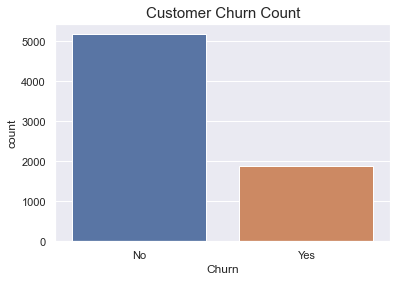

In [82]:
# Univariate Analysis - Target variable
plt.title('Customer Churn Count', fontsize=15)
sns.countplot(x='Churn', data=df)

plt.show()

**Target Variable Insight**

Based from result above, We can see that the majority of the target class is `No` with percentage of `0.7` compared to class `Yes` with percentage of `0.3`.\
Since the target has `0.7 : 0.3 ratio`, I consider this as `moderate imbalance dataset`.

**Service Related Analysis**

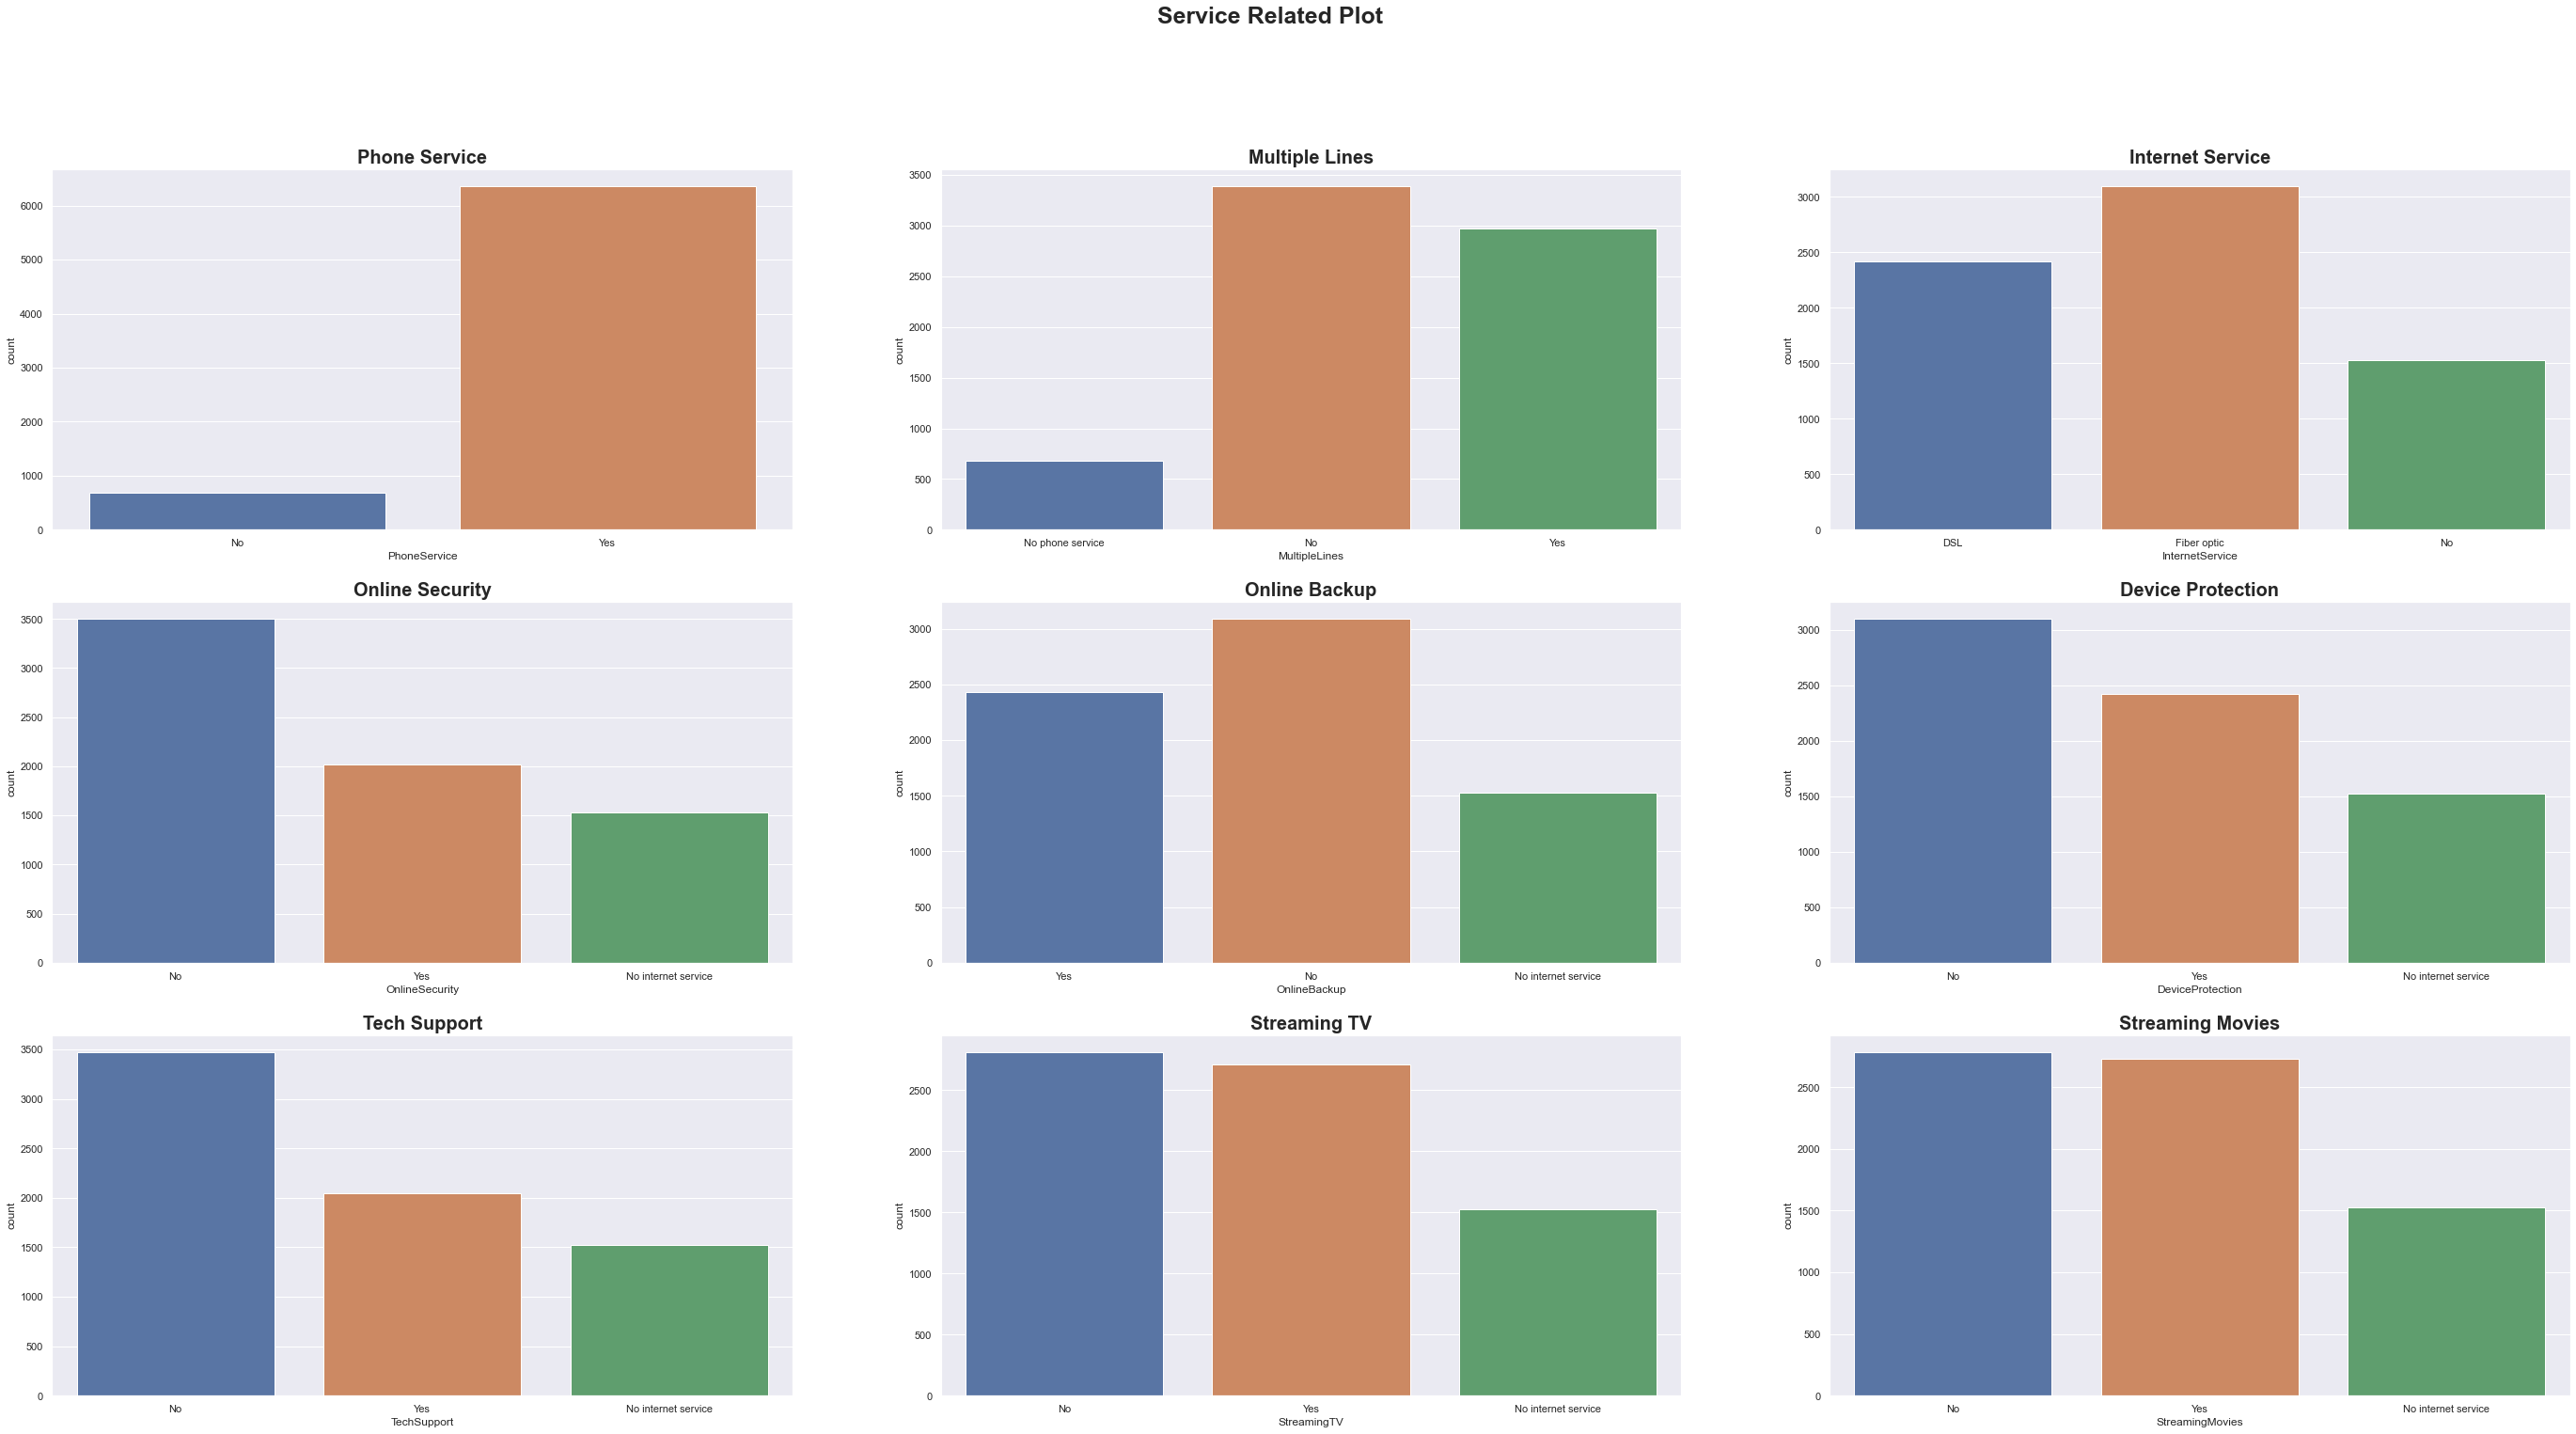

In [83]:
# Univariate Analysis - Service Related
fig, ax = plt.subplots(3,3, figsize=(24 * 2, 24))
fig.suptitle('Service Related Plot', fontsize=25, weight='bold')

sns.countplot(data=df, x='PhoneService', ax=ax[0,0])
ax[0,0].set_title('Phone Service', weight='bold', fontsize=20)

sns.countplot(data=df, x='MultipleLines', ax=ax[0,1])
ax[0,1].set_title('Multiple Lines', weight='bold', fontsize=20)

sns.countplot(data=df, x='InternetService', ax=ax[0,2])
ax[0,2].set_title('Internet Service', weight='bold', fontsize=20)

sns.countplot(data=df, x='OnlineSecurity', ax=ax[1,0])
ax[1,0].set_title('Online Security', weight='bold', fontsize=20)

sns.countplot(data=df, x='OnlineBackup', ax=ax[1,1])
ax[1,1].set_title('Online Backup', weight='bold', fontsize=20)

sns.countplot(data=df, x='DeviceProtection', ax=ax[1,2])
ax[1,2].set_title('Device Protection', weight='bold', fontsize=20)

sns.countplot(data=df, x='TechSupport', ax=ax[2,0])
ax[2,0].set_title('Tech Support', weight='bold', fontsize=20)

sns.countplot(data=df, x='StreamingTV', ax=ax[2,1])
ax[2,1].set_title('Streaming TV', weight='bold', fontsize=20)

sns.countplot(data=df, x='StreamingMovies', ax=ax[2,2])
ax[2,2].set_title('Streaming Movies', weight='bold', fontsize=20)

plt.show()

**Service Related Insight**

- Majority of the customer has `Phone Service`, some of them even has `Multiple Lines.` Only handful of customer has no `Phone Service`
- Majority of the customer signed for `Internet Service`, most of them prefer to `Fiber Optic` technology rather than `DSL.`
- Majority of the customer has no `Online Security`, `Online Backup`, `Device Protection`, and also `Tech Support.` This could mean that most our customer is not well aware of their safety `or` indicates that our company doesn't educate enough about their safety.
- There is no significant difference between customer that signed for streaming services and those who doesn't.

**Customer Account Information Analysis**

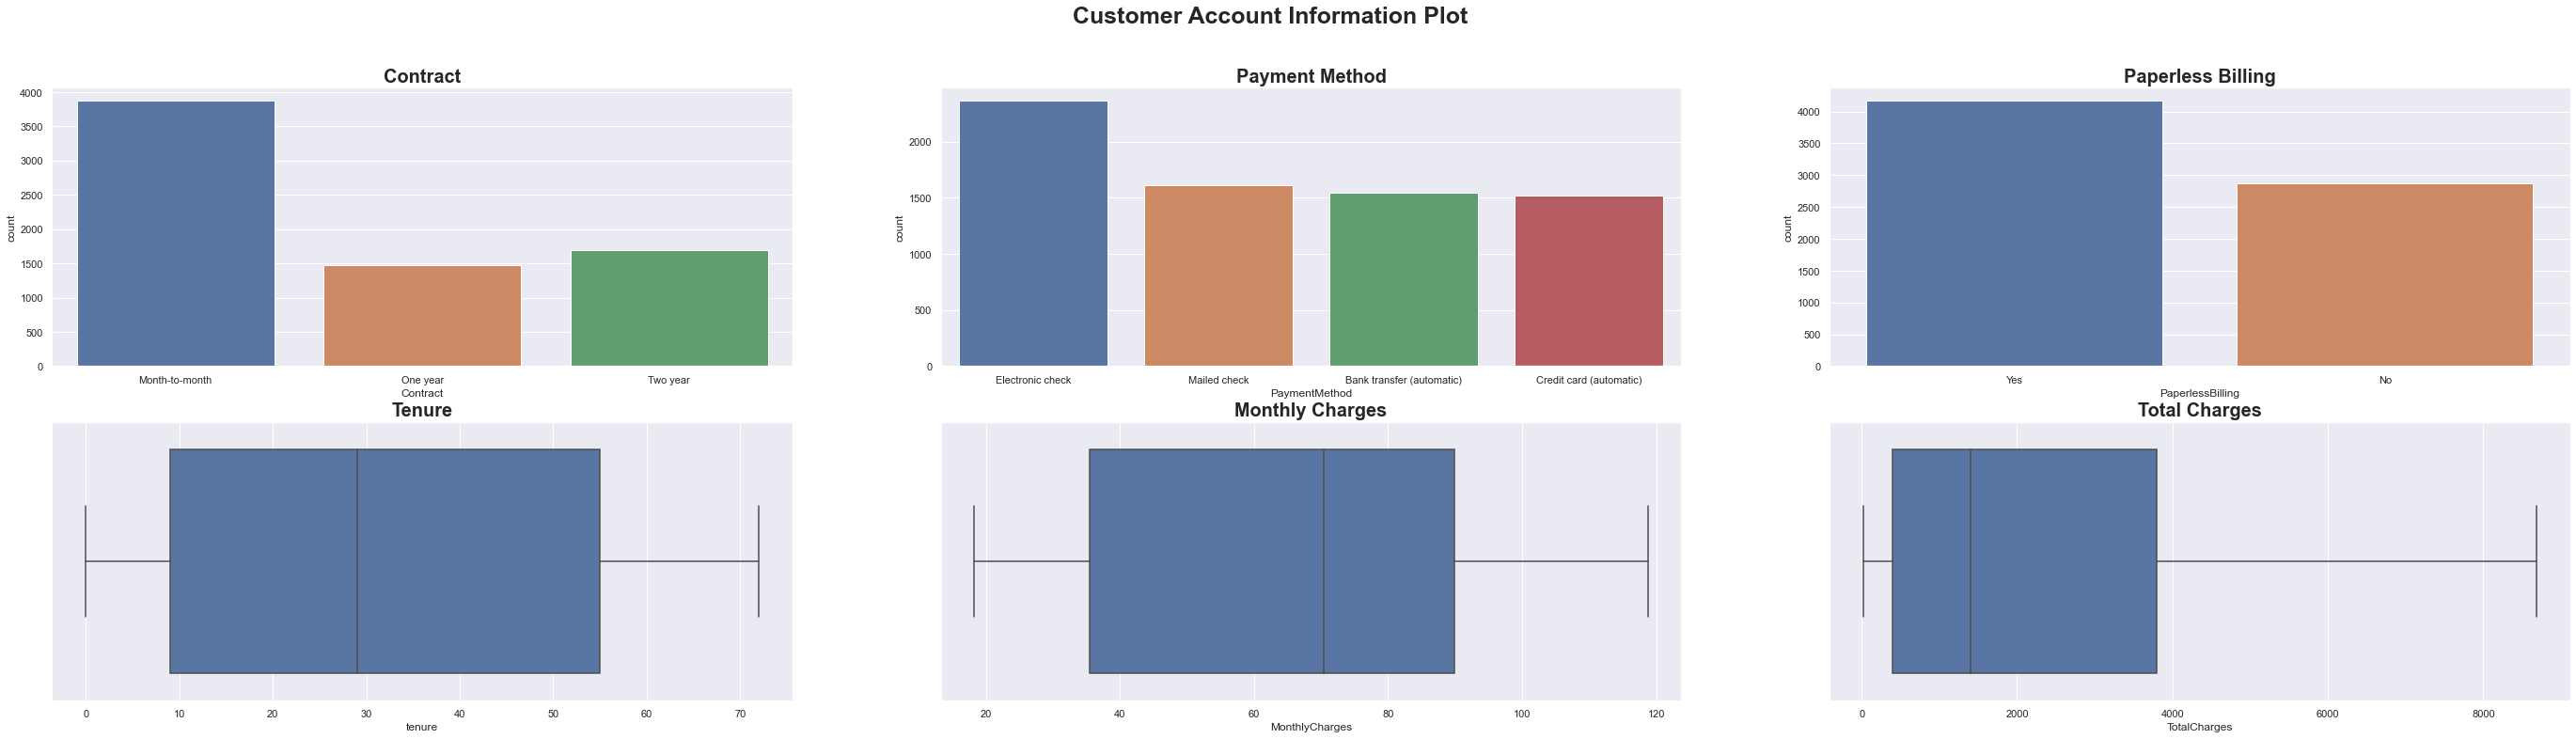

In [84]:
# Univariate Analysis - Customer Account Information Related
fig, ax = plt.subplots(2,3, figsize=(24 * 2, 12))
fig.suptitle('Customer Account Information Plot', fontsize=25, weight='bold')

sns.countplot(data=df, x='Contract', ax=ax[0,0])
ax[0,0].set_title('Contract', weight='bold', fontsize=20)

sns.countplot(data=df, x='PaymentMethod', ax=ax[0,1])
ax[0,1].set_title('Payment Method', weight='bold', fontsize=20)

sns.countplot(data=df, x='PaperlessBilling', ax=ax[0,2])
ax[0,2].set_title('Paperless Billing', weight='bold', fontsize=20)

sns.boxplot(data=df, x='tenure', ax=ax[1,0])
ax[1,0].set_title('Tenure', weight='bold', fontsize=20)

sns.boxplot(data=df, x='MonthlyCharges', ax=ax[1,1])
ax[1,1].set_title('Monthly Charges', weight='bold', fontsize=20)

sns.boxplot(data=df, x='TotalCharges', ax=ax[1,2])
ax[1,2].set_title('Total Charges', weight='bold', fontsize=20)

plt.show()

**Customer Account Information Insight**

- `Month-to-month` is most prefered contract type. Also there is no significant difference between `One year contract` count and `two year contract` count.
- `Electronic check` is most prefered payment method. Also there is no significant difference between other payment method. `Paperless Billing` is also most prefered billing method.
- Our customer has median `Tenure` of thirty months, with median `Monthly Charges` around `$70.` Both has slight skew in the distribution.
- It shown that `TotalCharges` has skew distribution.

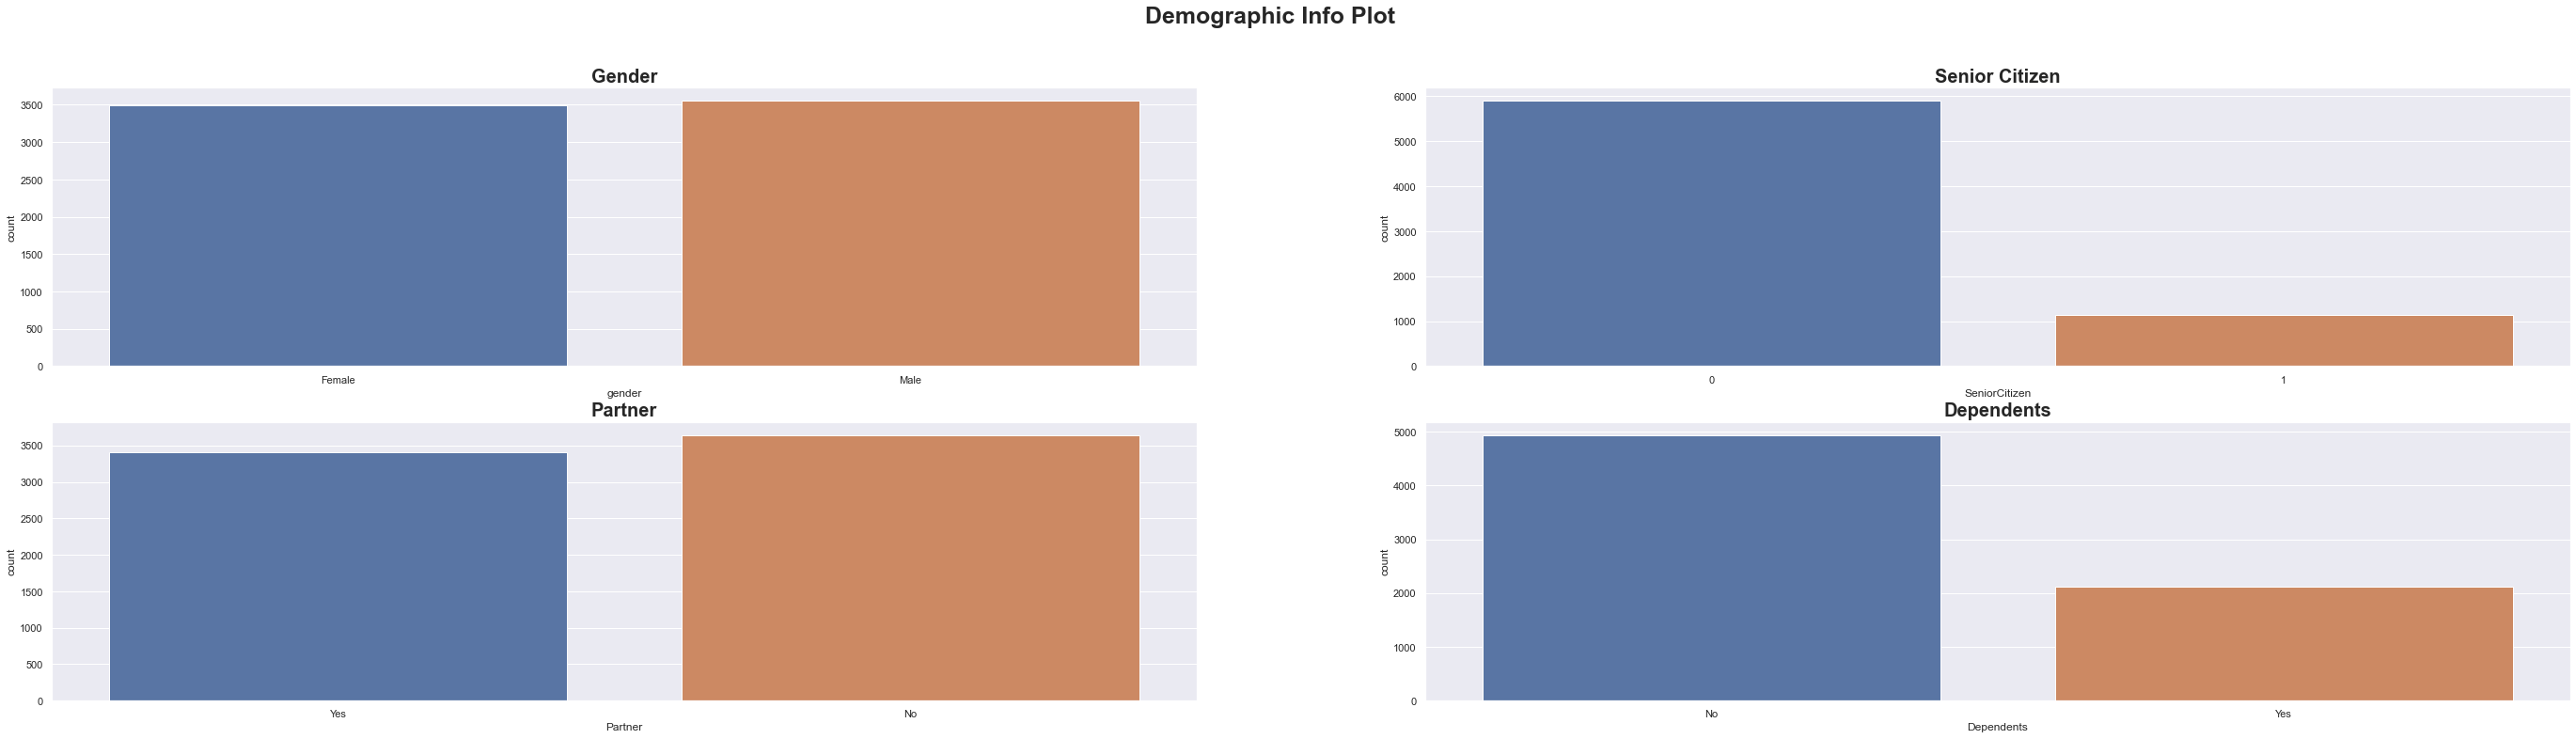

In [85]:
# Univariate Analysis - Customer Demographic Related
fig, ax = plt.subplots(2,2, figsize=(24 * 2, 12))
fig.suptitle('Demographic Info Plot', fontsize=25, weight='bold')

sns.countplot(data=df, x='gender', ax=ax[0,0])
ax[0,0].set_title('Gender', weight='bold', fontsize=20)

sns.countplot(data=df, x='SeniorCitizen', ax=ax[0,1])
ax[0,1].set_title('Senior Citizen', weight='bold', fontsize=20)

sns.countplot(data=df, x='Partner', ax=ax[1,0])
ax[1,0].set_title('Partner', weight='bold', fontsize=20)

sns.countplot(data=df, x='Dependents', ax=ax[1,1])
ax[1,1].set_title('Dependents', weight='bold', fontsize=20)

plt.show()

**Demographic Information Insight**

- Our service is equally popular regardless customer `Gender` and `Partner` type.
- Majority of our customer is relatively `young (not senior citizen)` and has no `Dependents.`

**Bivariate/Multivariate Analysis**

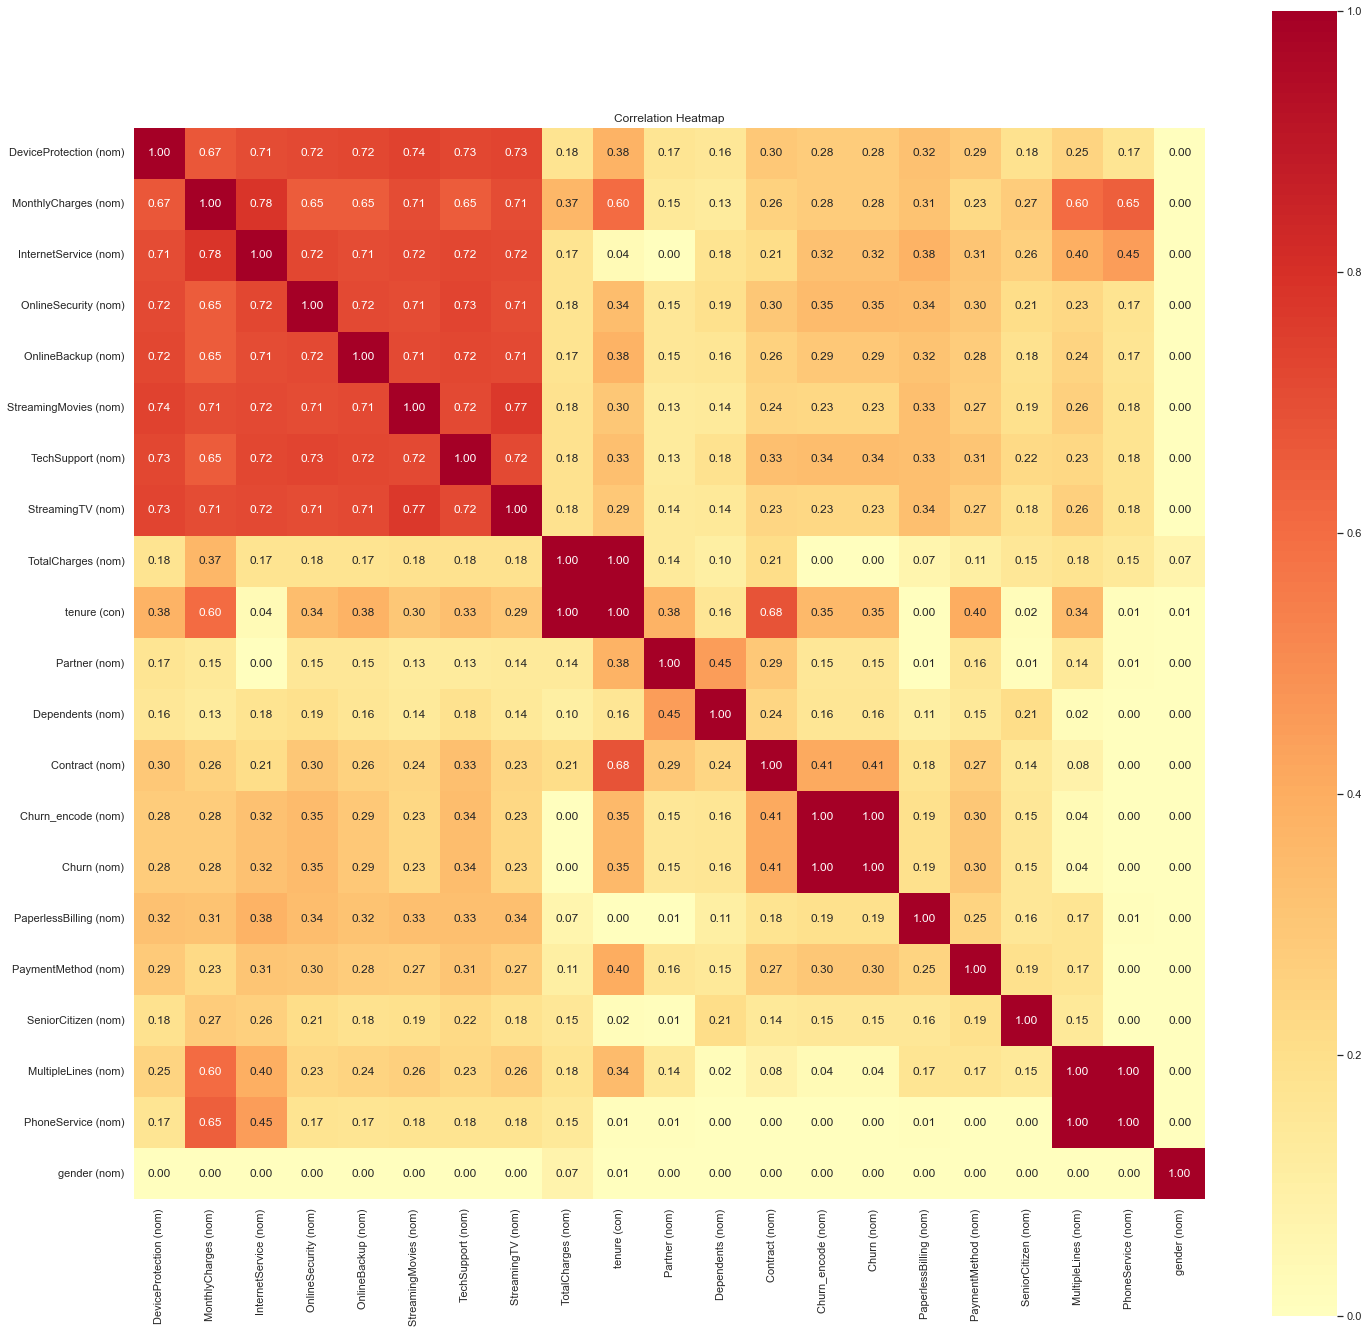

In [86]:
# Correlation Plot
correlation = associations(dataset=df, figsize=(24,24),
                            title= 'Correlation Heatmap',
                            numerical_columns=num_col, # Numerical Columns
                            nom_num_assoc= 'correlation_ratio', # Correlation Calculation Method for numerical columns
                            nominal_columns=cat_col, # Catetgorical Columns
                            nom_nom_assoc= 'cramer', # Correlation Calculation Method for categorical columns
                            nan_strategy='drop_samples',
                            clustering=True,
                            mark_columns=True,
                            cmap='RdYlGn_r'
                            )
correlation
plt.show()

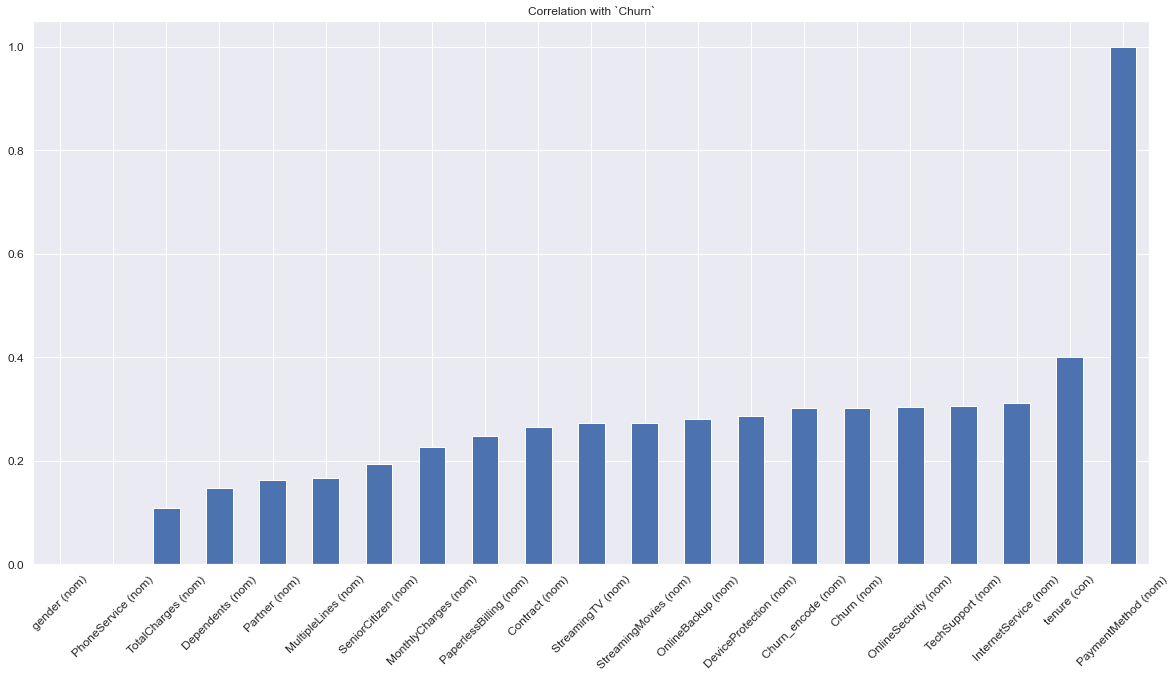

In [87]:
# Correlation Plot #2
correlation['corr'].iloc[16].abs().sort_values().plot.bar(figsize=(20,10), title='Correlation with `Churn`', fontsize=12, rot=45, grid=True) # .iloc[16] is the index for `Churn` target

plt.show()

Based on heatmap analysis (Multivariate Analysis), We know that features that shows strong correlation between features are:

- `PhoneService` and `MultipleLines`
- `MonthlyCharges` and `StreamingTV, StreamingMovies, TechSupport, OnlineBackup, DeviceProtection, InternetService, OnlineSecurity` 
- `TotalCharges` and `tenure`

Because above features shows high correlation with each others, I'll choose one feature over another and here's what I choose to include in my model:
- Drop `PhoneService` and keep `MultipleLines`, because `PhoneService` has lowest correlation with `Churn.`
- Drop `MonthlyCharges` and keep `StreamingTV, StreamingMovies, TechSupport, OnlineBackup, DeviceProtection, InternetService, OnlineSecurity`, because `MonthlyCharges` is heavily affected by how many services the customer subscribed.
- Drop `TotalCharges` and keep `tenure`, because `tenure` has higher correlation with `Churn` than `TotalCharges`, also higher tenure shows that the customer is loyal to us.

Besides above features, I'll also drop these features:
- Drop `StreamingTV` and keep `StreamingMovies`, because in my opinion both service is quite similar (streaming service), hence I choose to use one.

## Model Analysis

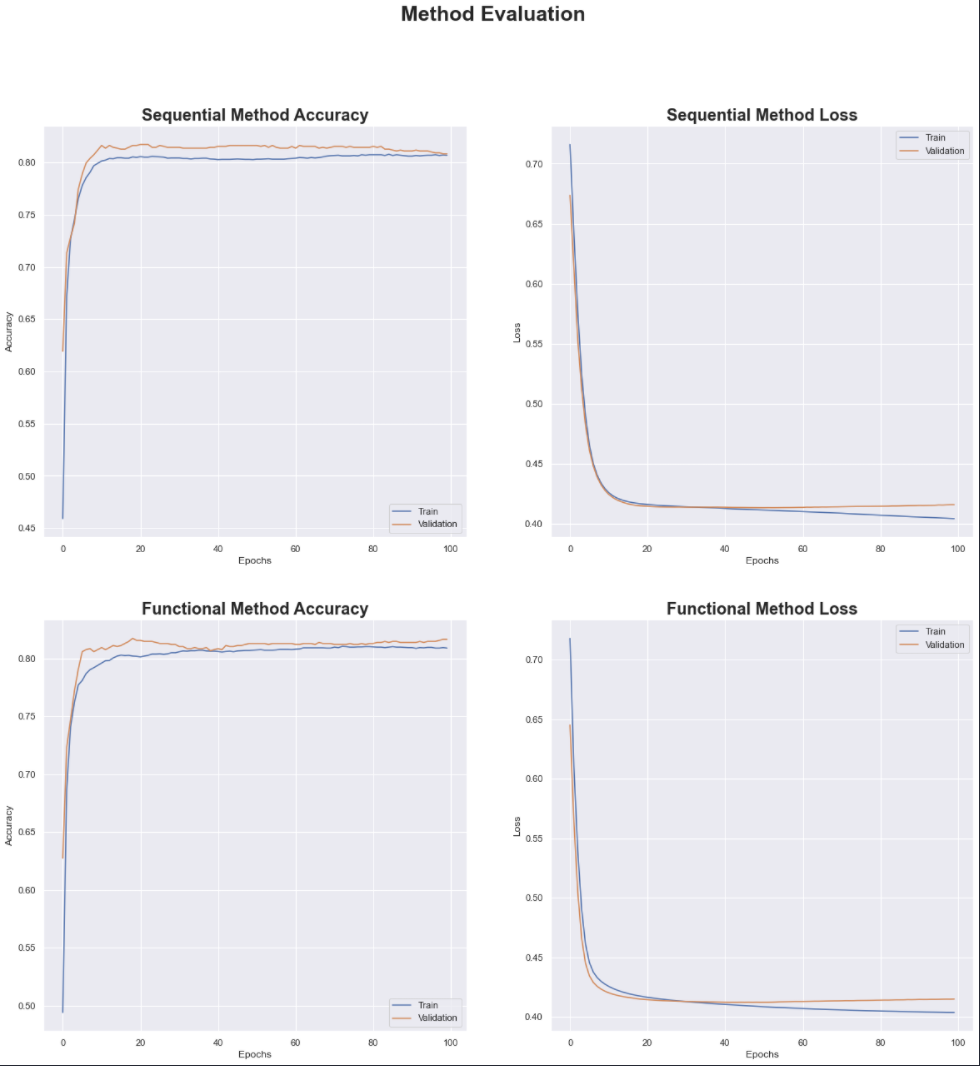

In [88]:
# Sequential Method vs Functional Method Evaluation

method_eval_1 = Image.open('method_eval_1.png')
method_eval_1

Based on graph above, We can see that:

**Sequential Method**
- by the epochs 20, the model start showing stable performance
- `Accuracy` shows stable performance as soon as epoch reach 20
- `Loss` converge at around epochs = 10, but they start separating again after epochs reach 50

**Functional Method**
- by the epochs 20, the model start showing stable performance
- `Accuracy` shows stable performance as soon as epoch reach 20
- `Loss` converge at around epochs = 25, but they start separating again after epochs reach 40

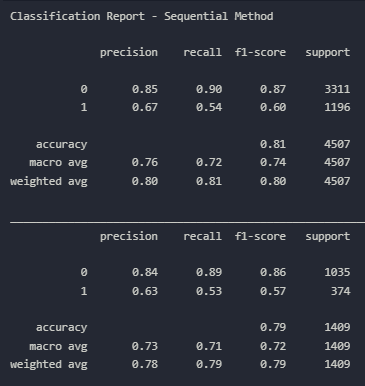

In [89]:
# Classification Report - Sequential Method
sequential_method_eval = Image.open('sequential_method_eval.png')
sequential_method_eval

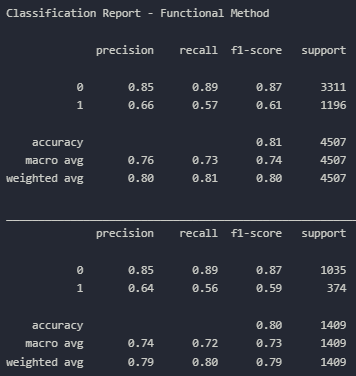

In [90]:
# Classification Report - Functional Method
functional_method_eval = Image.open('functional_method_eval.png')
functional_method_eval

Based on result above, We can see that:

**Sequential Method**
- Shows medium `accuracy` differences between `training phase and testing phase.` (2% differences)
- Shows tendency to predict class 0 relatively well compared to predict class 1.

**Functional Method**
- Shows small `accuracy` differences between `training phase and testing phase.` (1% differences)
- Shows tendency to predict class 0 relatively well compared to predict class 1.

**Conclusion**
- Functional Method shows slight better performance than Sequential Method.
- I think both models perform similarily well.
- I decide to try improve my `Sequential Model` in the next process.

### Improved Model

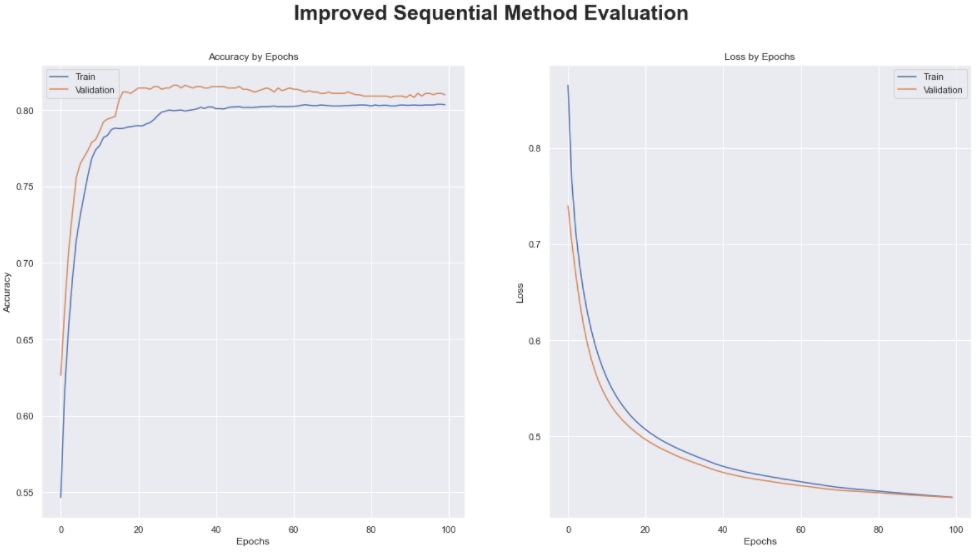

In [91]:
# Improved Sequential Method Evaluation

method_eval_2 = Image.open('method_eval_2.png')
method_eval_2

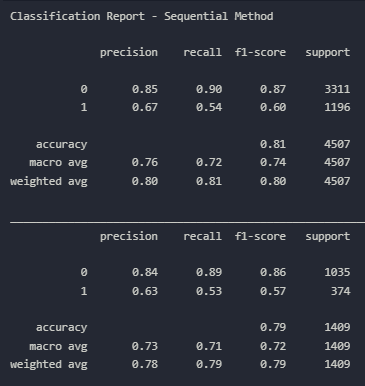

In [92]:
# Classification Report - Improved Sequential Method
sequential_method_eval = Image.open('sequential_method_eval.png')
sequential_method_eval

Based on result above, We can see that:

**Improved Sequential Method**
- Shows small `accuracy` differences between `training phase and testing phase.` (1% differences)
- Shows tendency to predict class 0 relatively well compared to predict class 1.

**Improvemnet Process Conclusion**

Based on result above, the improvement process that I had done made no significance improvement.\
I guess this caused by the fact that `Neural Network` are too powerful to be used in this project, so even tweaking the model would gives similar results to baseline model.

So, I decide to choose the `improved sequential method` model as my final model.